# Project description: Hypothesis testing and analysis of data on the sale of computer games by the online store "Streamchik". Data on game sales is provided before 2016, it is necessary to predict sales for 2017. There is data on sales in a number of popular regions such as North America, Europe and Japan, the rest of the world is represented under the article Other. You will need to identify the most popular platforms and genres in each region.

# Step 1. Importing Libraries 

In [18]:
#importing all the libraries that I will use
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Step 2. Download the data

In [21]:
#downloading the data
data = pd.read_csv('games.csv')

# Step 3. Preparing the data for analysis

## Step 3.1. Changing the column names

In [25]:
#displaying the first five lines to understand which columns should be changed
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [29]:
#all the names to lowercase
columns = data.columns
columns = ';'.join(columns).lower()
columns = columns.split(';')
data.columns = columns
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Step 3.2. Converting data to the required types

In [34]:
#display general information about all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [36]:
#changing the data type to integer
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [38]:
#changing the data type to integer
data['critic_score'] = data['critic_score'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


## Step 3.3. Pass processing

In [41]:
# creating a loop that looks for passes in the dataframe
all_columns = []
all_columns.extend(data.columns)
for i in all_columns:
    if (data[i].isna().sum() > 0):
         display(f'В столбце {i} пропуски есть')
    else:
        display(f'В столбце {i} пропусков нет')

'В столбце name пропуски есть'

'В столбце platform пропусков нет'

'В столбце year_of_release пропуски есть'

'В столбце genre пропуски есть'

'В столбце na_sales пропусков нет'

'В столбце eu_sales пропусков нет'

'В столбце jp_sales пропусков нет'

'В столбце other_sales пропусков нет'

'В столбце critic_score пропуски есть'

'В столбце user_score пропуски есть'

'В столбце rating пропуски есть'

In [43]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [45]:
# deleted the passes in the column 'name' because there were only two passes and they would not have greatly affected
data = data[data['name'].isna()==False]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


**I left the passes in the year_of_release column because you can't replace it with an average number. Most likely, these gaps appeared due to errors in filling out or due to the fact that it is impossible to understand exactly when the game was released.**

**The passes in the genre column have been deleted along with the omissions in the name column.**

**I left the passes in the critic_score column because each game is different and you can't replace the gaps with an average value. Most likely, the passes appeared due to the fact that the game was old and there were still no critics who evaluated the games. Or there is still no rating due to the fact that the game is not well-known.**

**I left the passes in the user_score column because each game is different and you can't replace the passes with some average values.
Most likely, the omissions appeared due to the fact that the game was old and there were still no critics who evaluated the games. Or there is still no rating due to the fact that the game is not well-known.**

**I left the passes in the rating column because each game has its own age rating and it cannot be replaced with an average number. Most likely, the passes appeared due to the age or popularity of the game.**

In [52]:
#looking at what values exist in the user_score column
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [54]:
#changing all tbd values to zeros
data.loc[data['user_score']=='tbd', 'user_score'] = 0
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [56]:
#changed all the passes to zeros so that they do not differ from tbd
data['user_score'] = data['user_score'].fillna(0)

## Step 3.4. Creating a separate column

In [59]:
#creating a separate column with the total amount of sales for each row
data['all_sales'] = 0
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,0,NaN,0.01


### Step 3.4. Conclusion: added a new column with the total number of sales, which will greatly help in future research

In [62]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       16713 non-null  object 
 10  rating           9949 non-null   object 
 11  all_sales        16713 non-null  float64
dtypes: Int64(2), float64(5), object(5)
memory usage: 1.7+ MB


## Step 3.5. Checking for simple duplicates

In [65]:
#checking for simple duplicates
data.duplicated().sum()

0

In [67]:
#checking for duplicates on the three main columns
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [69]:
#removing duplicates in the three main columns and leaving the first entry
data['name', 'platform', 'year_of_release'] = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], 
                                                                   keep='first', inplace=True)

In [71]:
#check
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

### Step 3.5. Conclusion: there are no simple duplicates in the dataframe. Duplicates in the three main columns have been deleted.

## Step 3. Results: All data has been prepared for analysis. Changed the data type for some of the columns. I replaced the omissions with zeros or left them out of desperation. Deleted all duplicates. In general, the data is ready for analysis

# Step 4. Conducting a research analysis of the data

## Step 4.1. The number of games released for each year

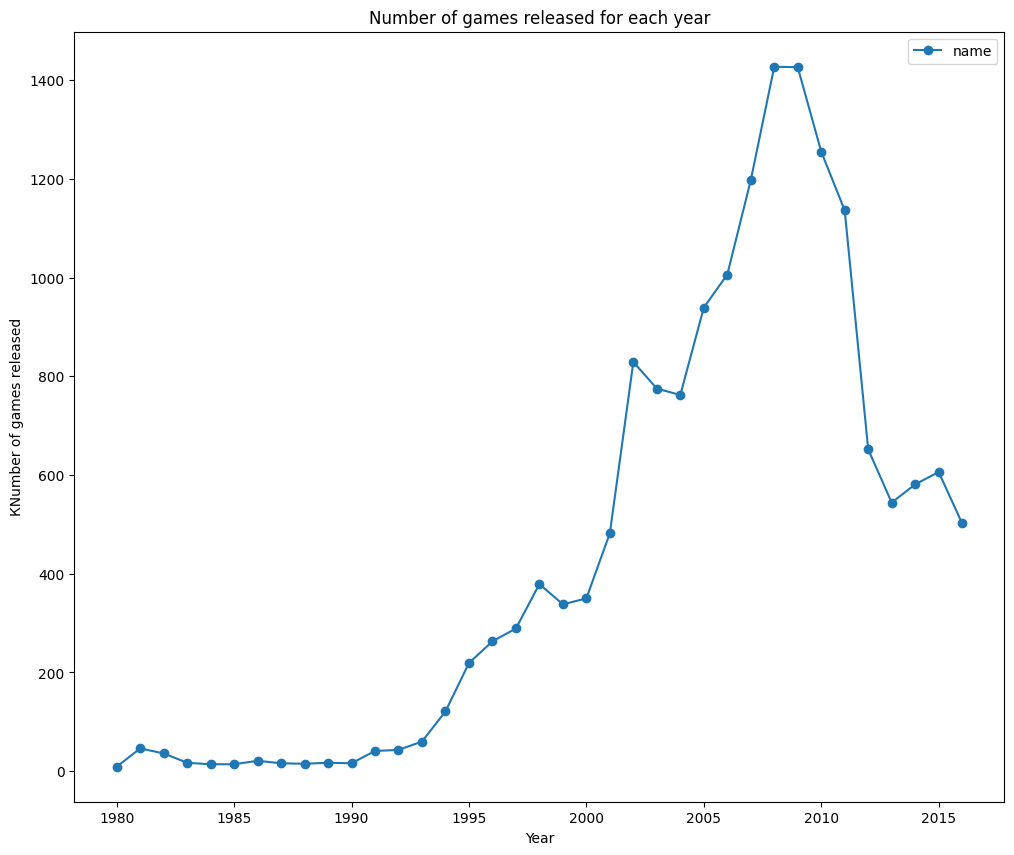

In [77]:
count_games = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
count_games.plot(figsize=(12,10), style='o-');
plt.xlabel('Year')
plt.ylabel('КNumber of games released')
plt.title('Number of games released for each year')
plt.show()

### Conclusion: Most games were created between 2005 and 2012.

## Step 4.2. Changing sales by Platform

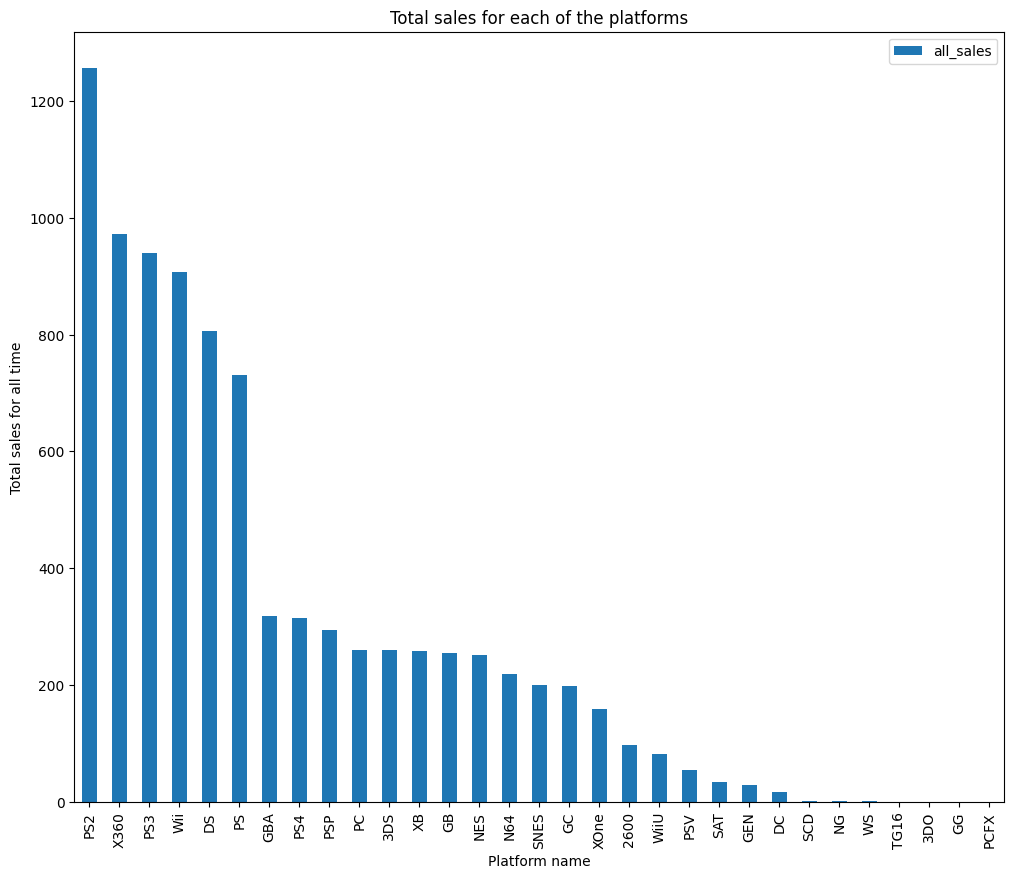

In [81]:
platforms = data.pivot_table(index='platform',  values='all_sales', aggfunc='sum')
platforms = platforms.sort_values(by='all_sales', ascending=False).reset_index()
platforms.plot(x='platform', y='all_sales', kind='bar', figsize=(12, 10));
plt.xlabel('Platform name')
plt.ylabel('Total sales for all time')
plt.title('Total sales for each of the platforms');

In [83]:
#have left the top 6 most popular platforms
platforms_top6 = platforms.loc[0:5]
platforms_top6

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86


In [85]:
#creating a separate table with only the platforms in the top 6.
new_data = data[data['platform'].isin(list(platforms_top6['platform']))]
#creating another table with information only about sales for each year for each of the leader platforms
data_1 = new_data.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
data_1

,platform,year_of_release,all_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


In [87]:
#creating a separate table for each of the platforms
data_PS2 = data_1.query('platform == "PS2"')
data_X360 = data_1.query('platform == "X360"')
data_PS3 = data_1.query('platform == "PS3"')
data_Wii = data_1.query('platform == "Wii"')
data_DS = data_1.query('platform == "DS"')
#removing the 1985 outlier
data_DS = data_DS[data_DS['year_of_release']>1990]
data_PS = data_1.query('platform == "PS"')

In [89]:
#the command to make the graph clearer
%config InlineBackend.figure_format='retina'

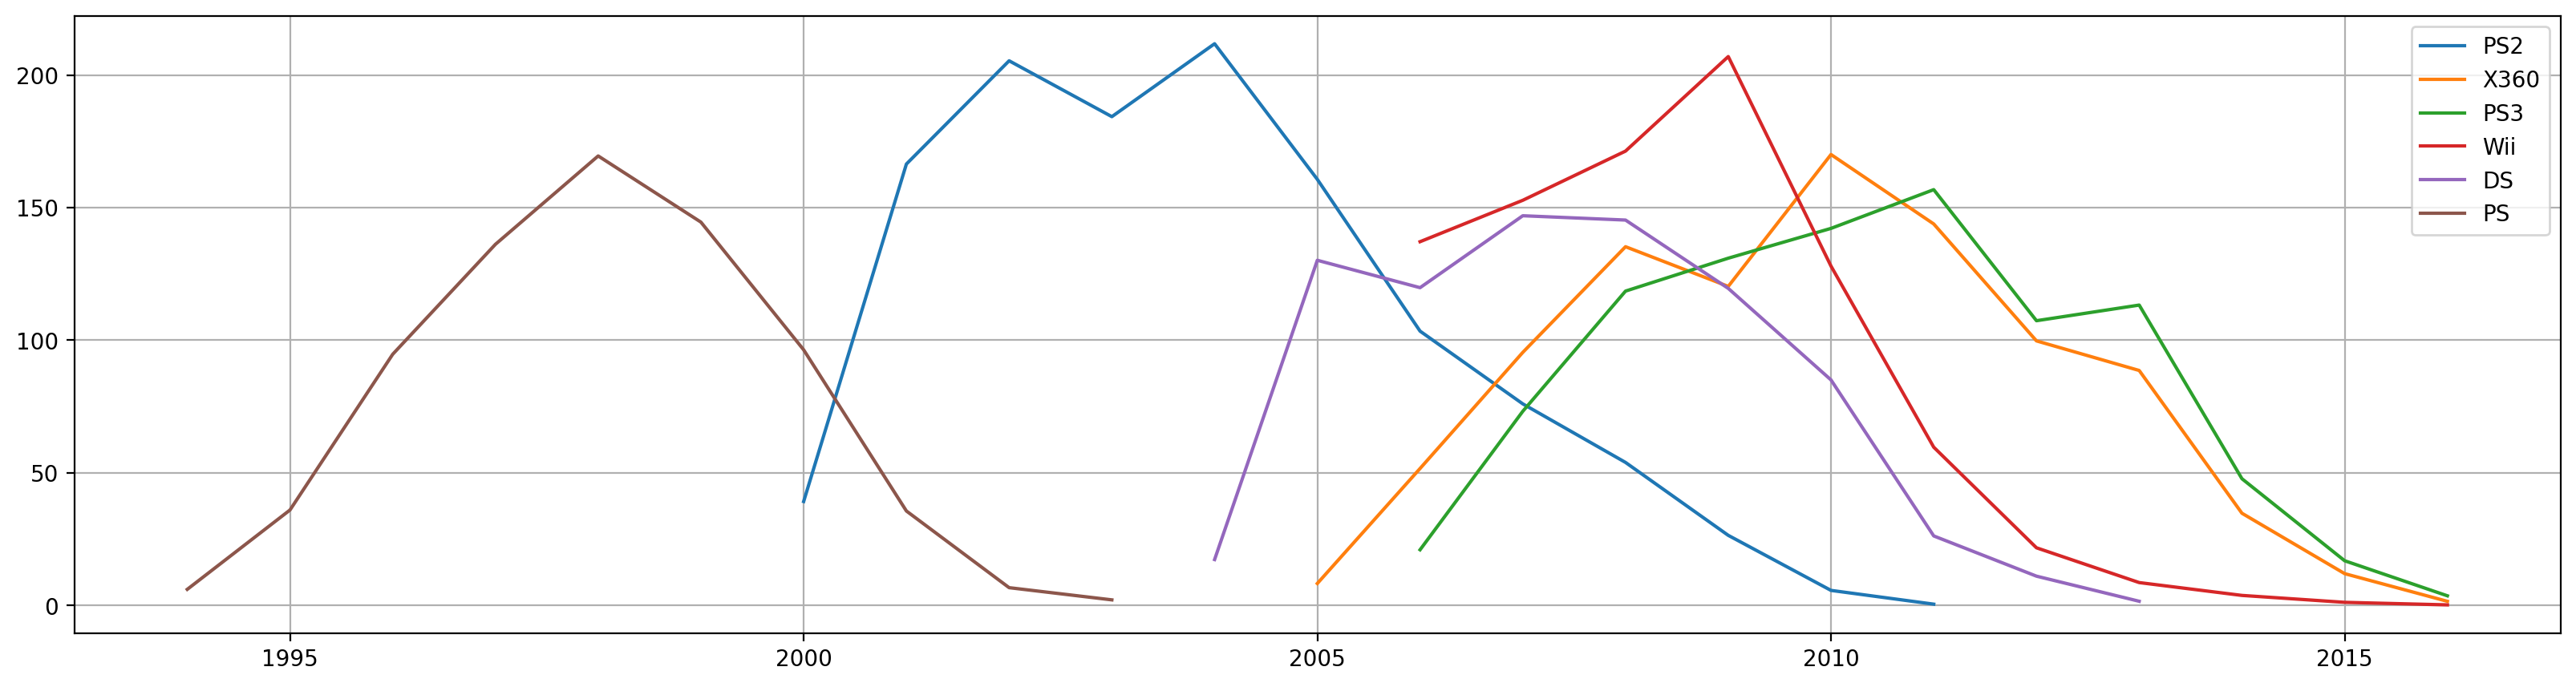

In [91]:
#drawing a graph showing sales statistics for each of the top 6 platforms
plt.figure(figsize=(20,5))
plt.plot(data_PS2['year_of_release'],data_PS2['all_sales'], label='PS2')
plt.plot(data_X360['year_of_release'],data_X360['all_sales'], label='X360')
plt.plot(data_PS3['year_of_release'],data_PS3['all_sales'], label='PS3')
plt.plot(data_Wii['year_of_release'],data_Wii['all_sales'], label='Wii')
plt.plot(data_DS['year_of_release'],data_DS['all_sales'], label='DS')
plt.plot(data_PS['year_of_release'],data_PS['all_sales'], label='PS')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion: On average, the lifetime of one platform is 12 years, after that time they become obsolete and are replaced by newer models.**

## Step 4.3. Determining the current period

**Due to the fact that the gaming industry is very dynamic, the current period should not be too long, but it should not be too small either. I think the period from 2013 to 2017 is best suited, we need to remove all inappropriate data.**

In [96]:
#filtering out unnecessary data
data = data.query('year_of_release >= 2013')
data['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64

## Step 4.4. Determining the Sales Leader

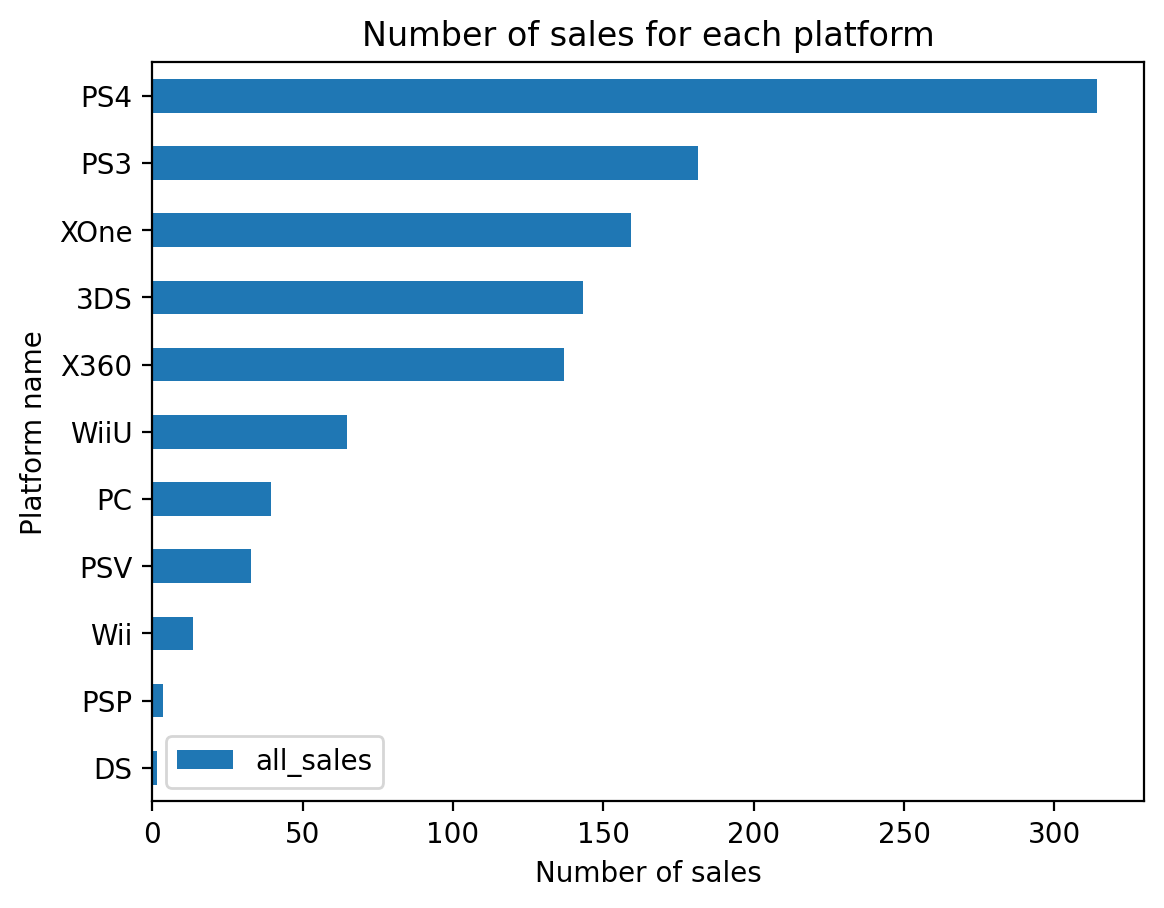

In [99]:
#creating a separate dataframe that will help set up a schedule to determine the leaders
data_leader = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales').plot.barh();
plt.xlabel('Number of sales')
plt.ylabel('Platform name')
plt.title('Number of sales for each platform');

**The top 3 in terms of number of sales are PS4, PS3 and Xbox one.**

In [102]:
#defining all unique values in the platform column
data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [104]:
#creating a generalized table by platform
data_2 = data.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
#дcreating a separate table for each of the platforms
data_X360 = data_2.query('platform == "X360"')
data_PS3 = data_2.query('platform == "PS3"')
data_Wii = data_2.query('platform == "Wii"')
data_DS = data_2.query('platform == "DS"')
data_PSP = data_2.query('platform == "PSP"')
data_PS4 = data_2.query('platform == "PS4"')
data_XOne = data_2.query('platform == "XOne"')
data_WiiU = data_2.query('platform == "WiiU"')
data_PC = data_2.query('platform == "PC"')
data_PSV = data_2.query('platform == "PSV"')
data_3DS = data_2.query('platform == "3DS"')

In [106]:
#changing colors for graphs
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

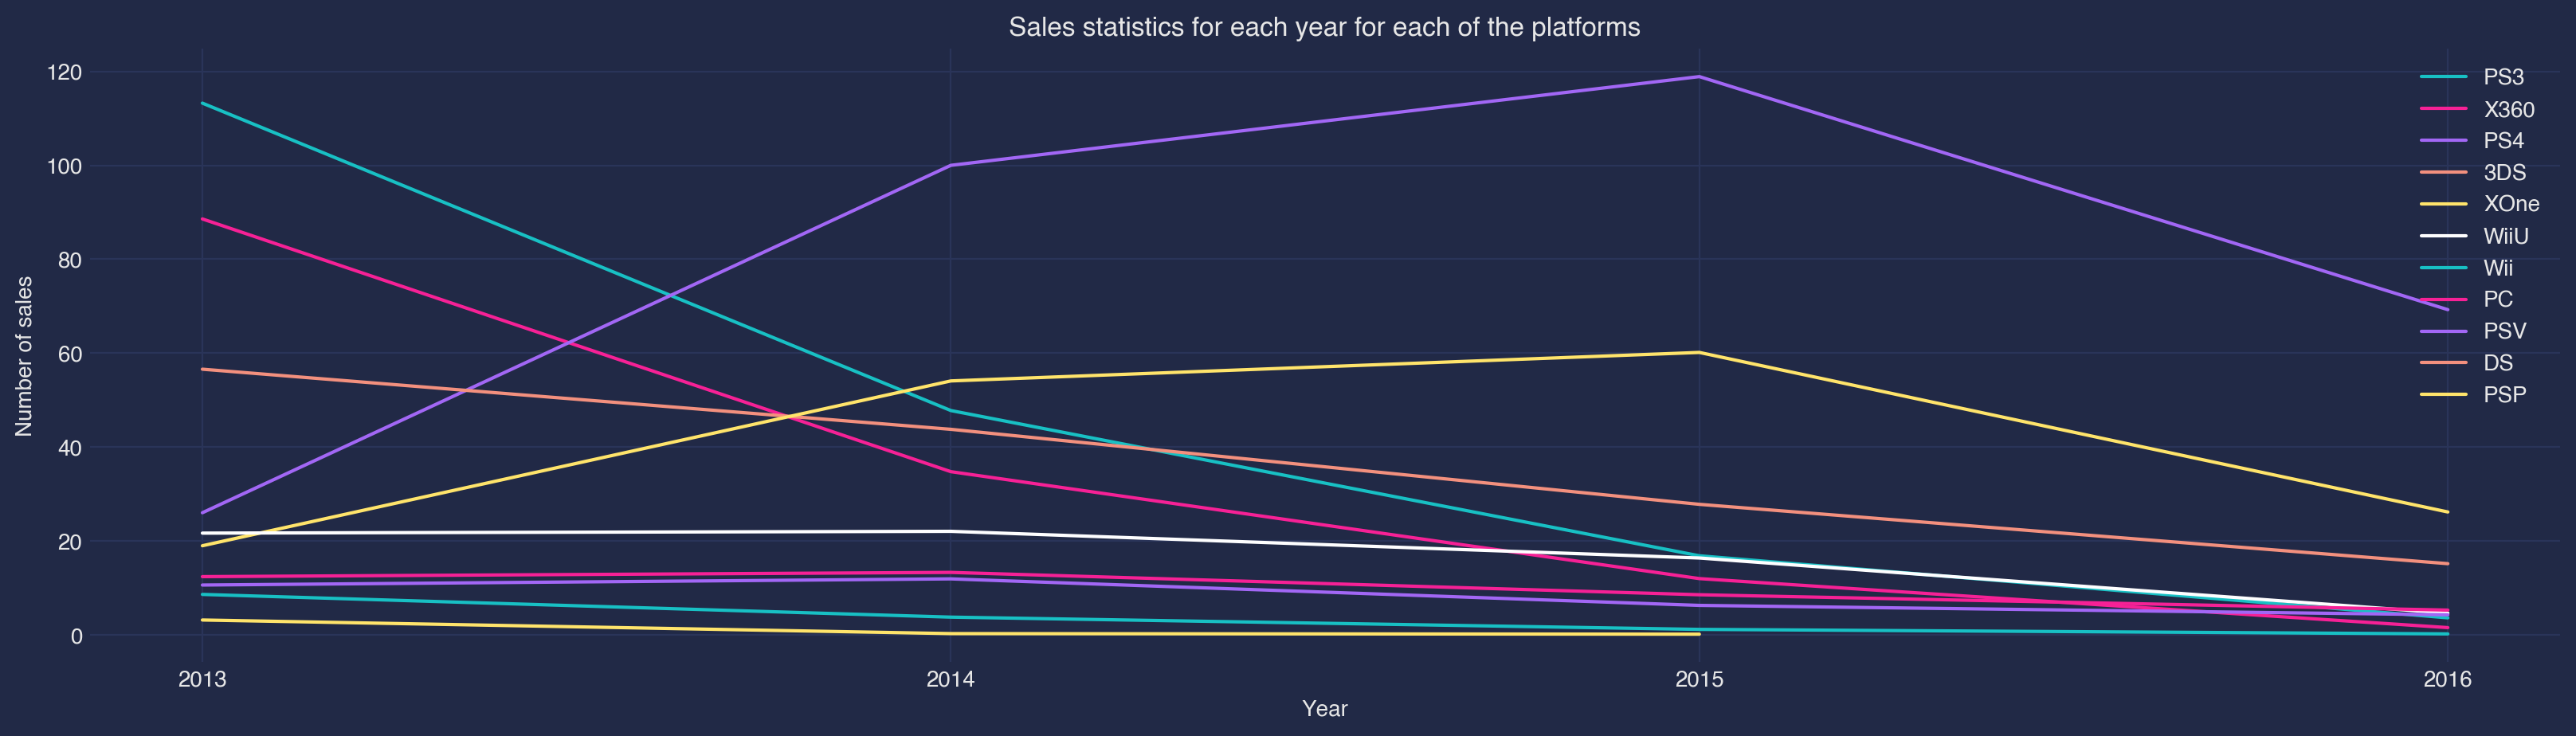

In [107]:
#drawing a graph showing sales statistics for each of the platforms
plt.figure(figsize=(20,5))
plt.plot(data_PS3['year_of_release'],data_PS3['all_sales'], label='PS3')
plt.plot(data_X360['year_of_release'],data_X360['all_sales'], label='X360')
plt.plot(data_PS4['year_of_release'],data_PS4['all_sales'], label='PS4')
plt.plot(data_3DS['year_of_release'],data_3DS['all_sales'], label='3DS')
plt.plot(data_XOne['year_of_release'],data_XOne['all_sales'], label='XOne')
plt.plot(data_WiiU['year_of_release'],data_WiiU['all_sales'], label='WiiU')
plt.plot(data_Wii['year_of_release'],data_Wii['all_sales'], label='Wii')
plt.plot(data_PC['year_of_release'],data_PC['all_sales'], label='PC')
plt.plot(data_PSV['year_of_release'],data_PSV['all_sales'], label='PSV')
plt.plot(data_DS['year_of_release'],data_DS['all_sales'], label='DS')
plt.plot(data_PSP['year_of_release'],data_PSP['all_sales'], label='PSP')
plt.title('Sales statistics for each year for each of the platforms')
plt.xlabel('Year')
plt.ylabel('Number of sales')
plt.xticks([2013, 2014, 2015, 2016])
plt.legend()
plt.grid(True)
plt.show()

### Step 4.4. Conclusion: The most promising platforms are PS4, XOne, 3DS and PSP, sales of games on these platforms exceed 20 million per year.  Platforms such as PS4 and XOne are likely to continue their growth. Platforms such as Wii, PSP and DS can be said to be extinct, most likely due to the fact that they are very outdated.

## Step 4.5. Create a "box with a mustache" chart for global game sales by platform.

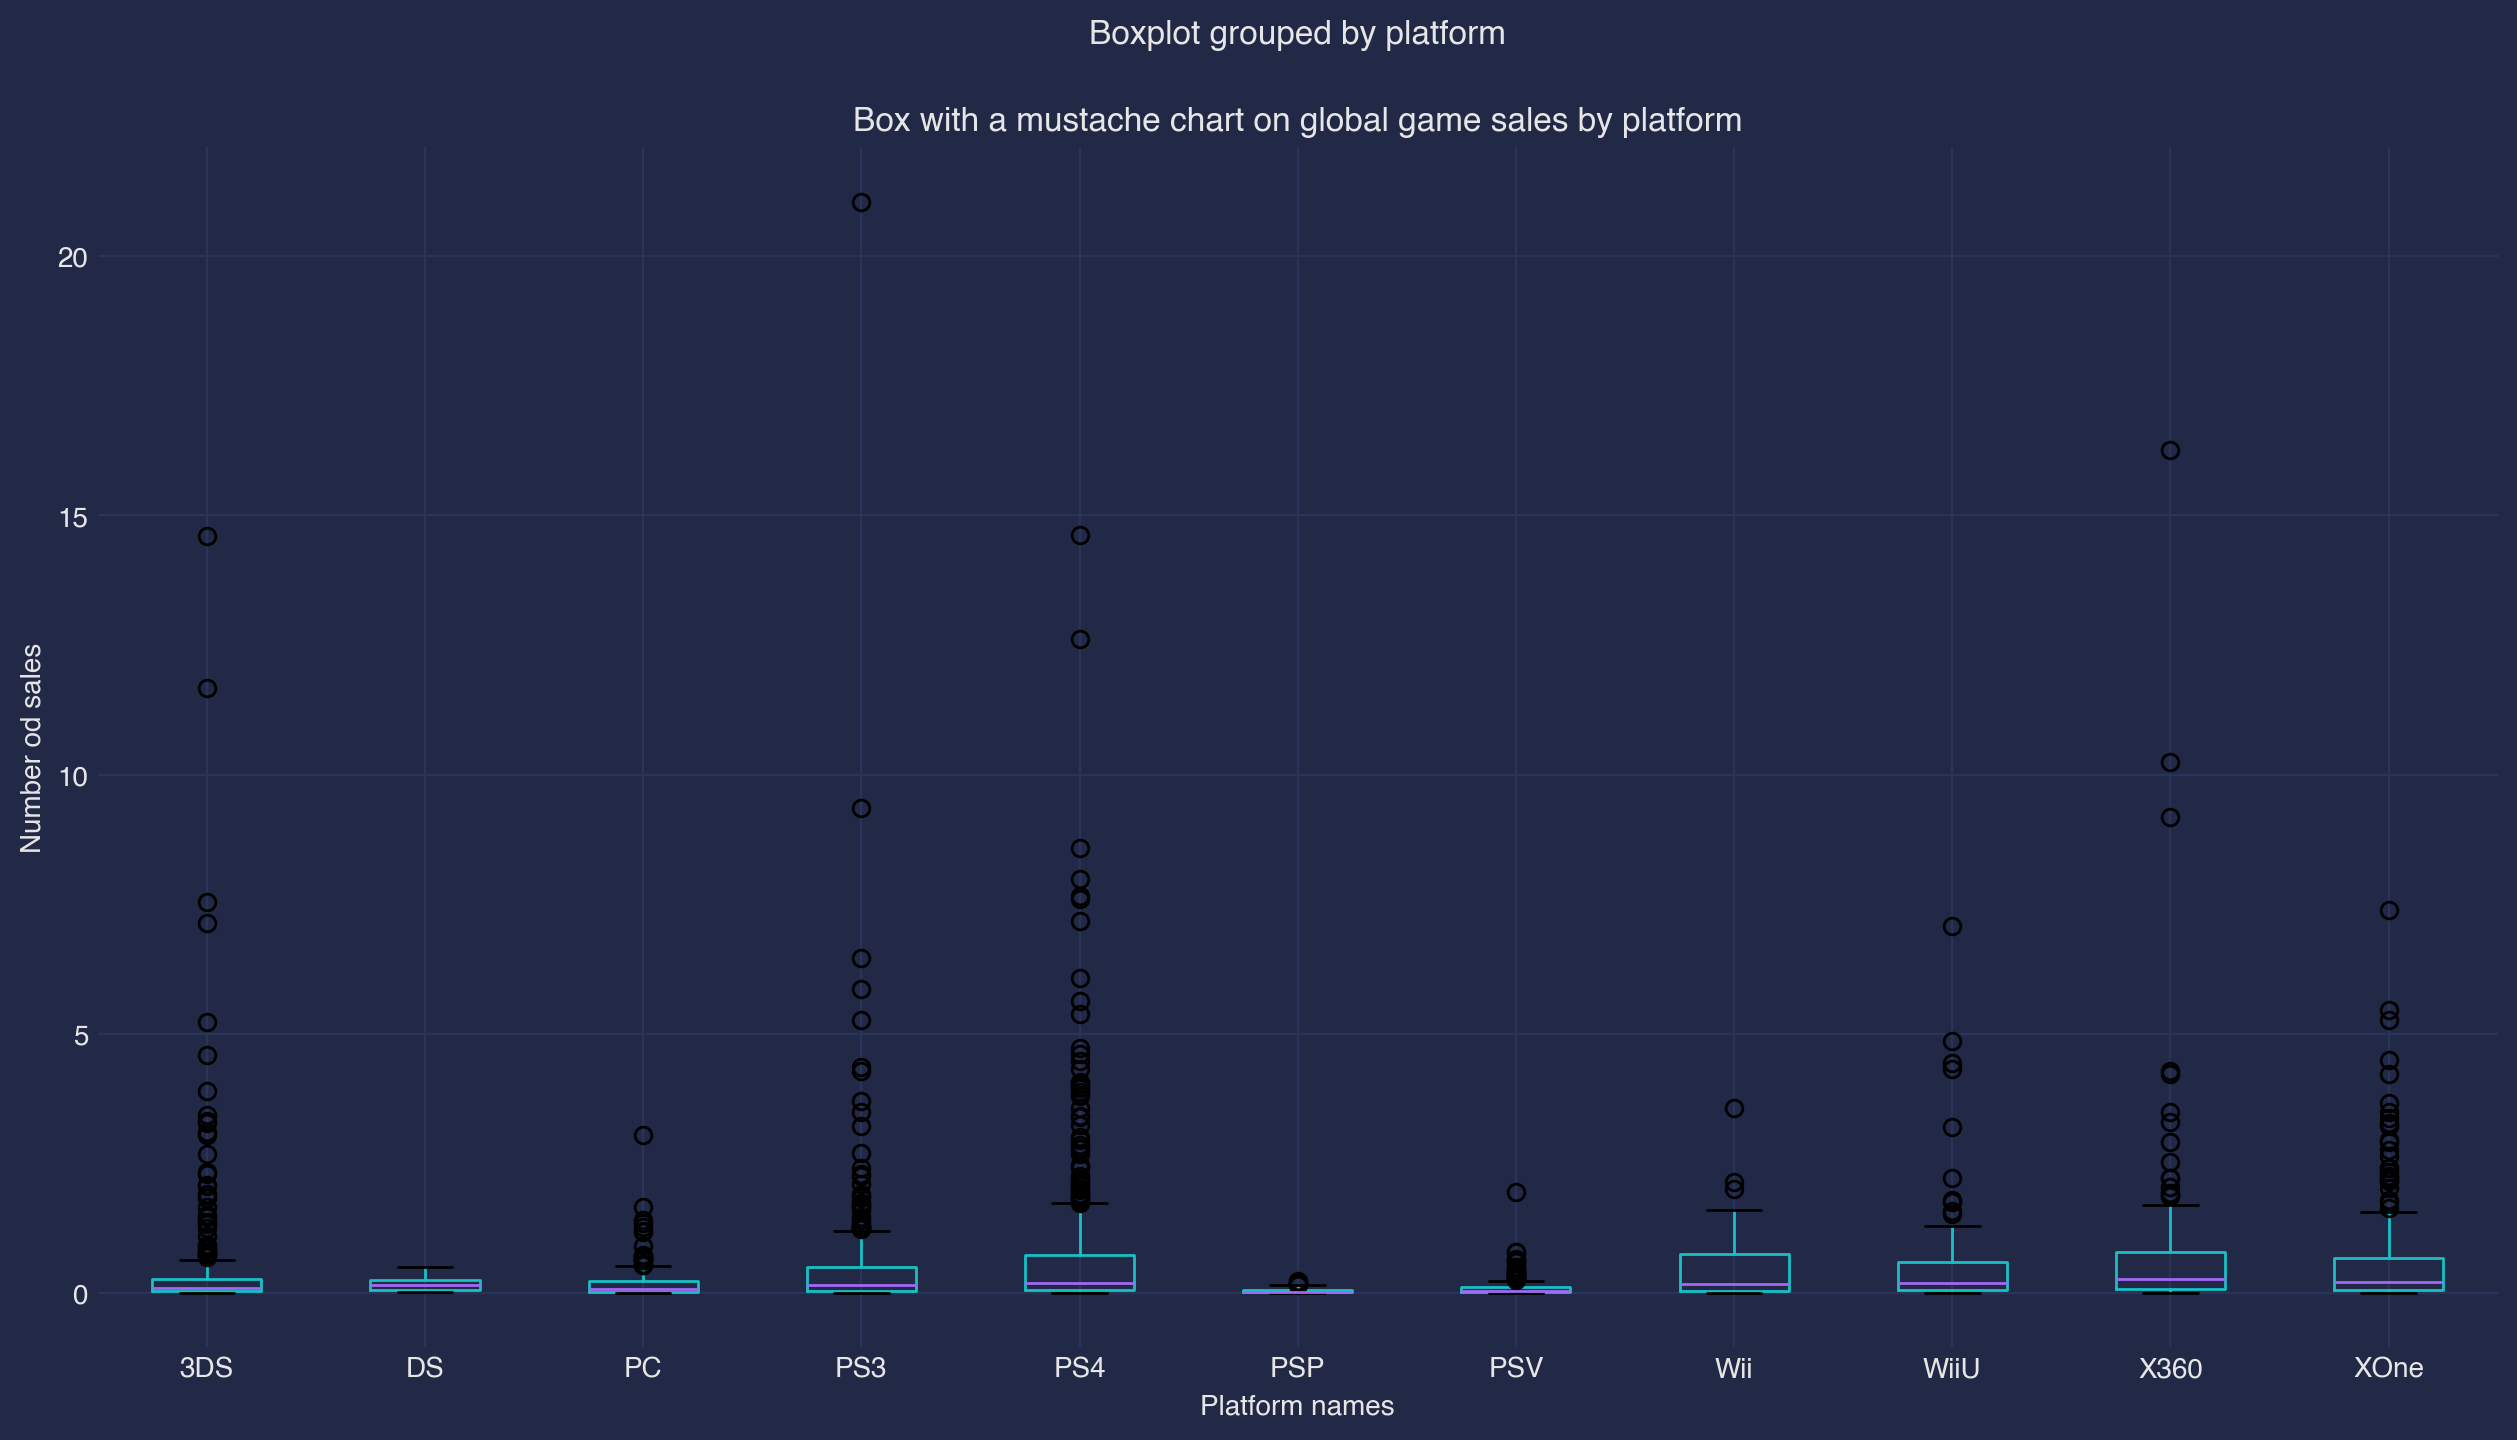

In [112]:
#creating a "box with a mustache" graph
data.boxplot('all_sales', by='platform', figsize=(15, 8));
plt.xlabel('Platform names')
plt.ylabel('Number od sales')
plt.title('Box with a mustache chart on global game sales by platform');

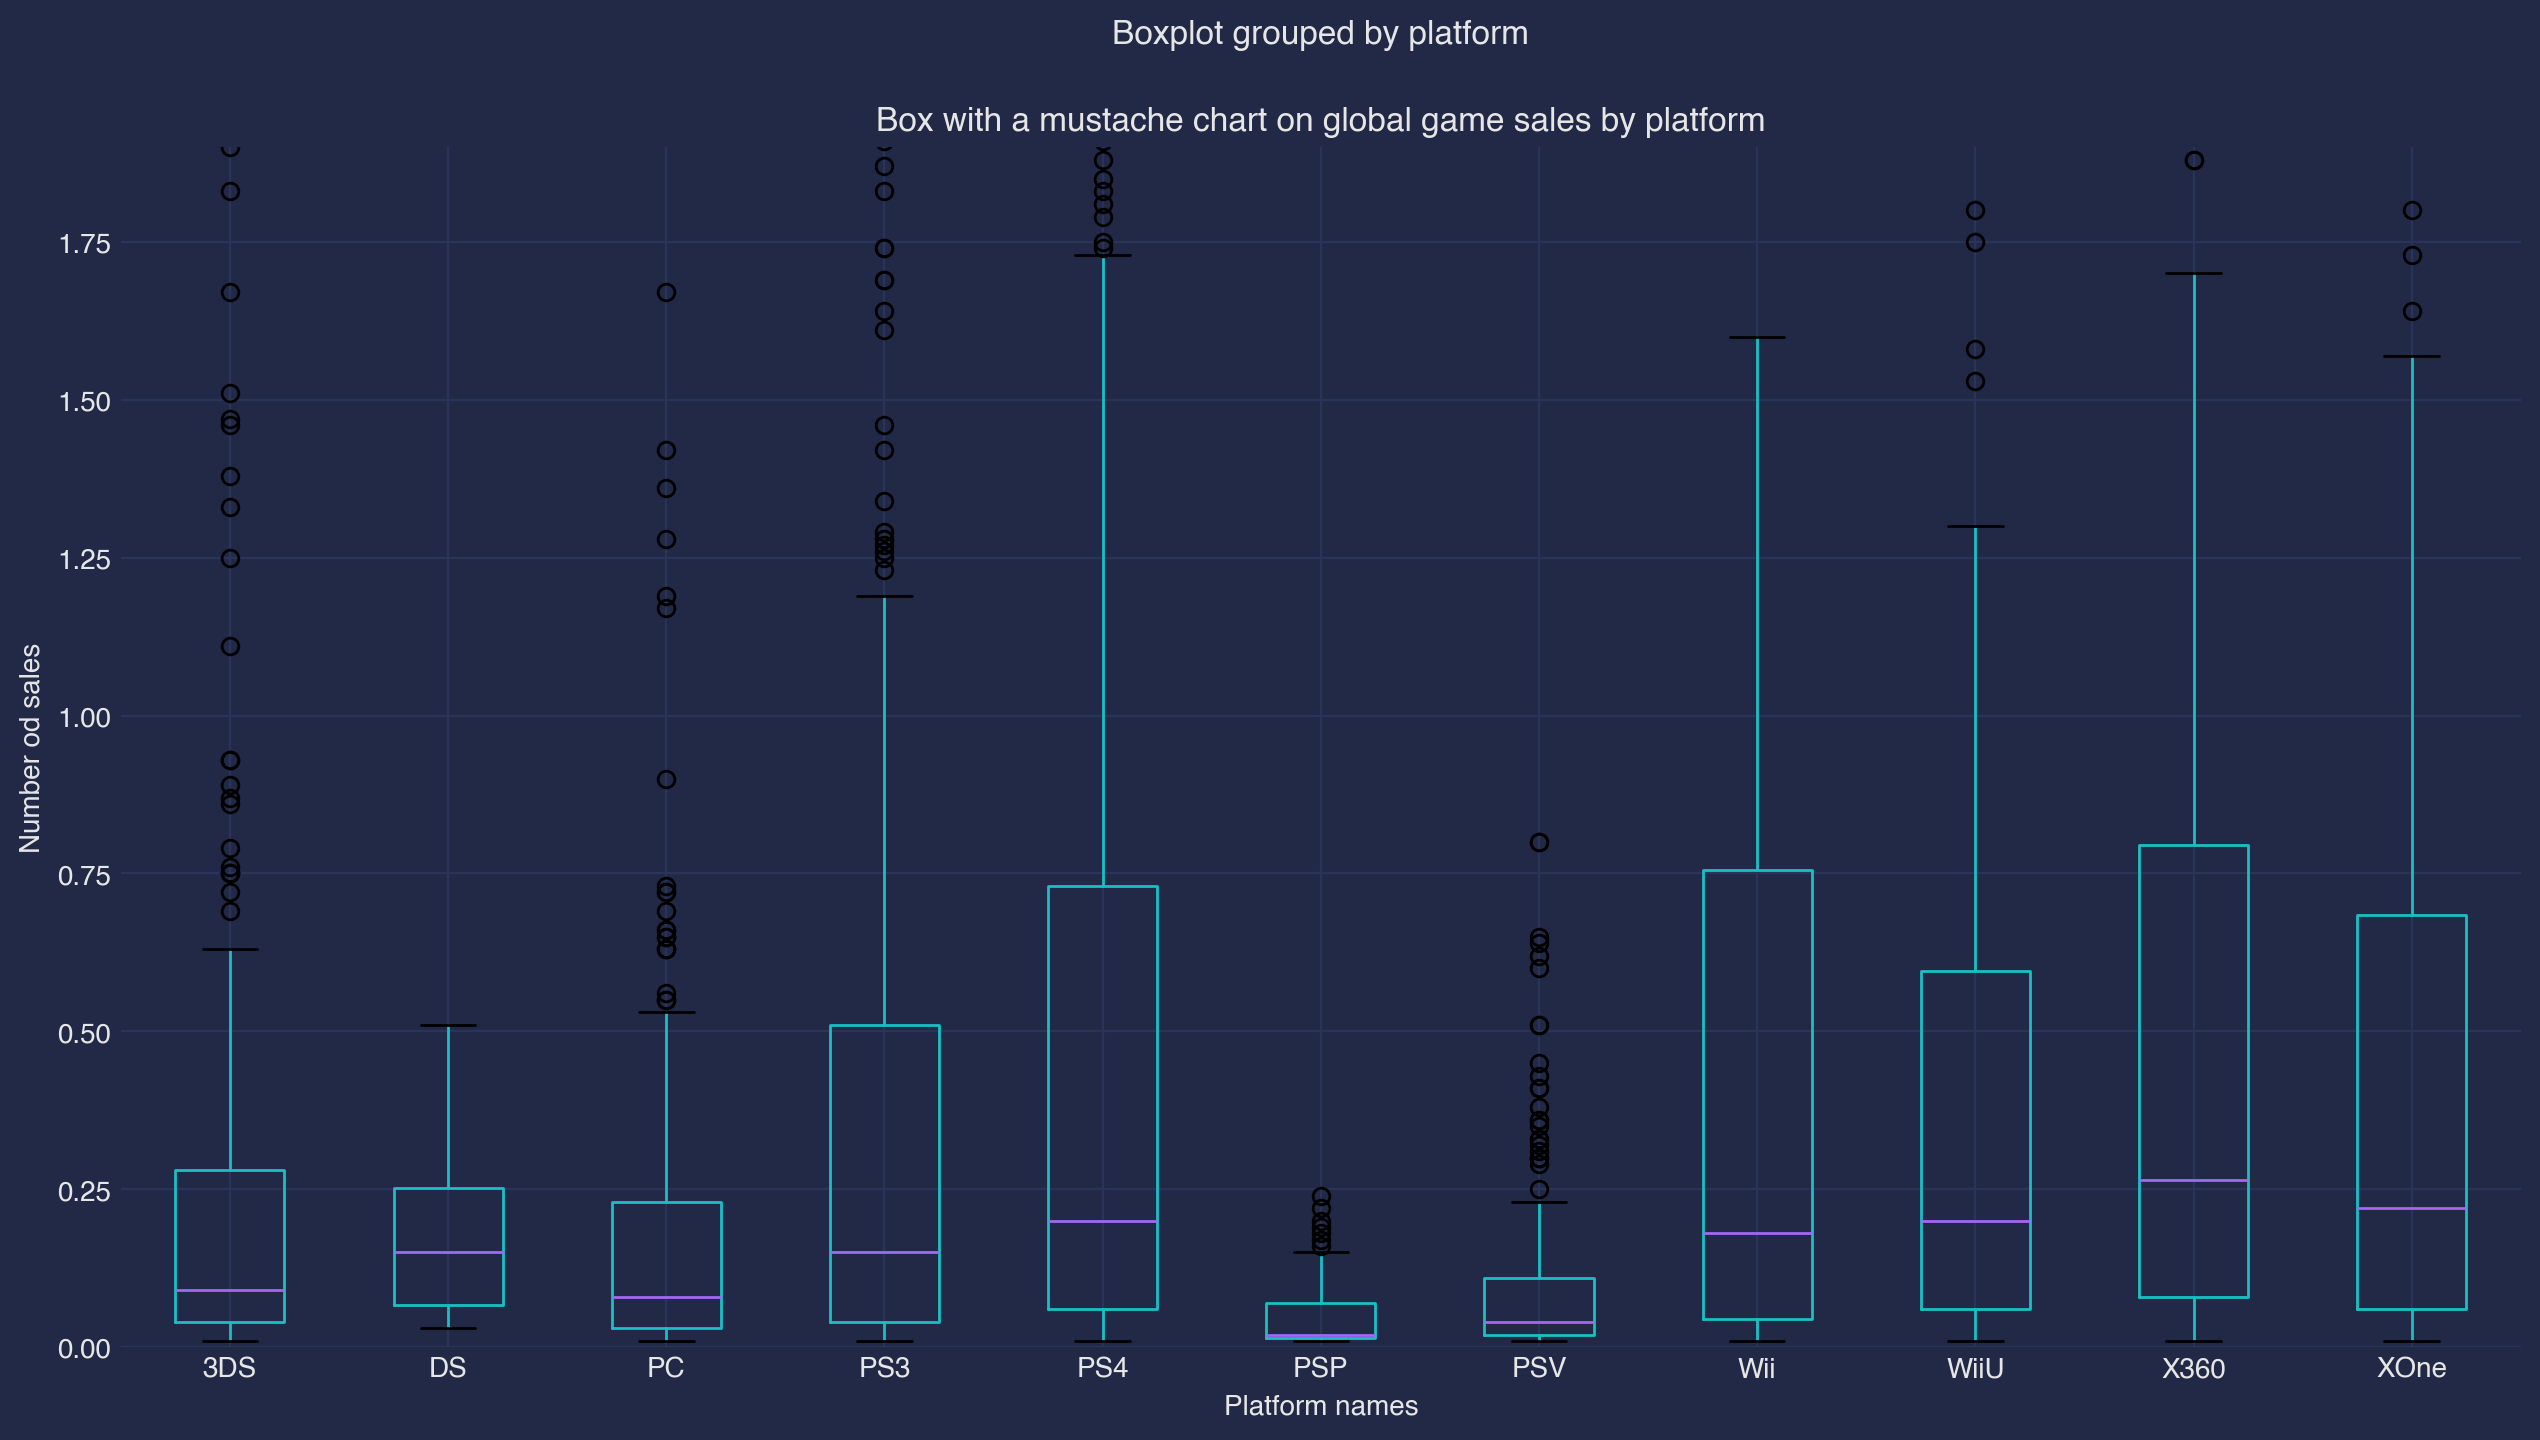

In [114]:
#creating a "box with a mustache" graph
data.boxplot('all_sales', by='platform', figsize=(15, 8));
plt.xlabel('Platform names')
plt.ylabel('Number od sales')
plt.title('Box with a mustache chart on global game sales by platform');
plt.ylim(0, 1.9);

### Step 4.5. Conclusion: The sales record for the year belongs to the PS4 platform, followed by the PS3, and then the X360. As for the DS platform, we can say that we have data on it for only one year, most likely 2013, and after this year, something new probably came to replace this platform. On average, 20 million games are sold on each platform per year..

## Step 4.6. Create a scatter plot and calculate the correlation coefficient between critical reviews and sales within several popular platforms. For research, I'll take the PS4, PS3 and XOne platforms.

In [118]:
#creating a new dataframe for calculating the Pearson correlation coefficient
data_PS4_corr = data.query('platform=="PS4"')

In [120]:
#removing all the passes
data_PS4_corr = data_PS4_corr[data_PS4_corr['critic_score'].isna()==False]

In [122]:
#changing the data type to float so that it doesn't give errors
data_PS4_corr['critic_score'] = data_PS4_corr['critic_score'].astype('float')

In [124]:
#calculating the Pearson correlation coefficient
data_PS4_corr['critic_score'].corr(data_PS4_corr['all_sales'])

0.4065679020617816

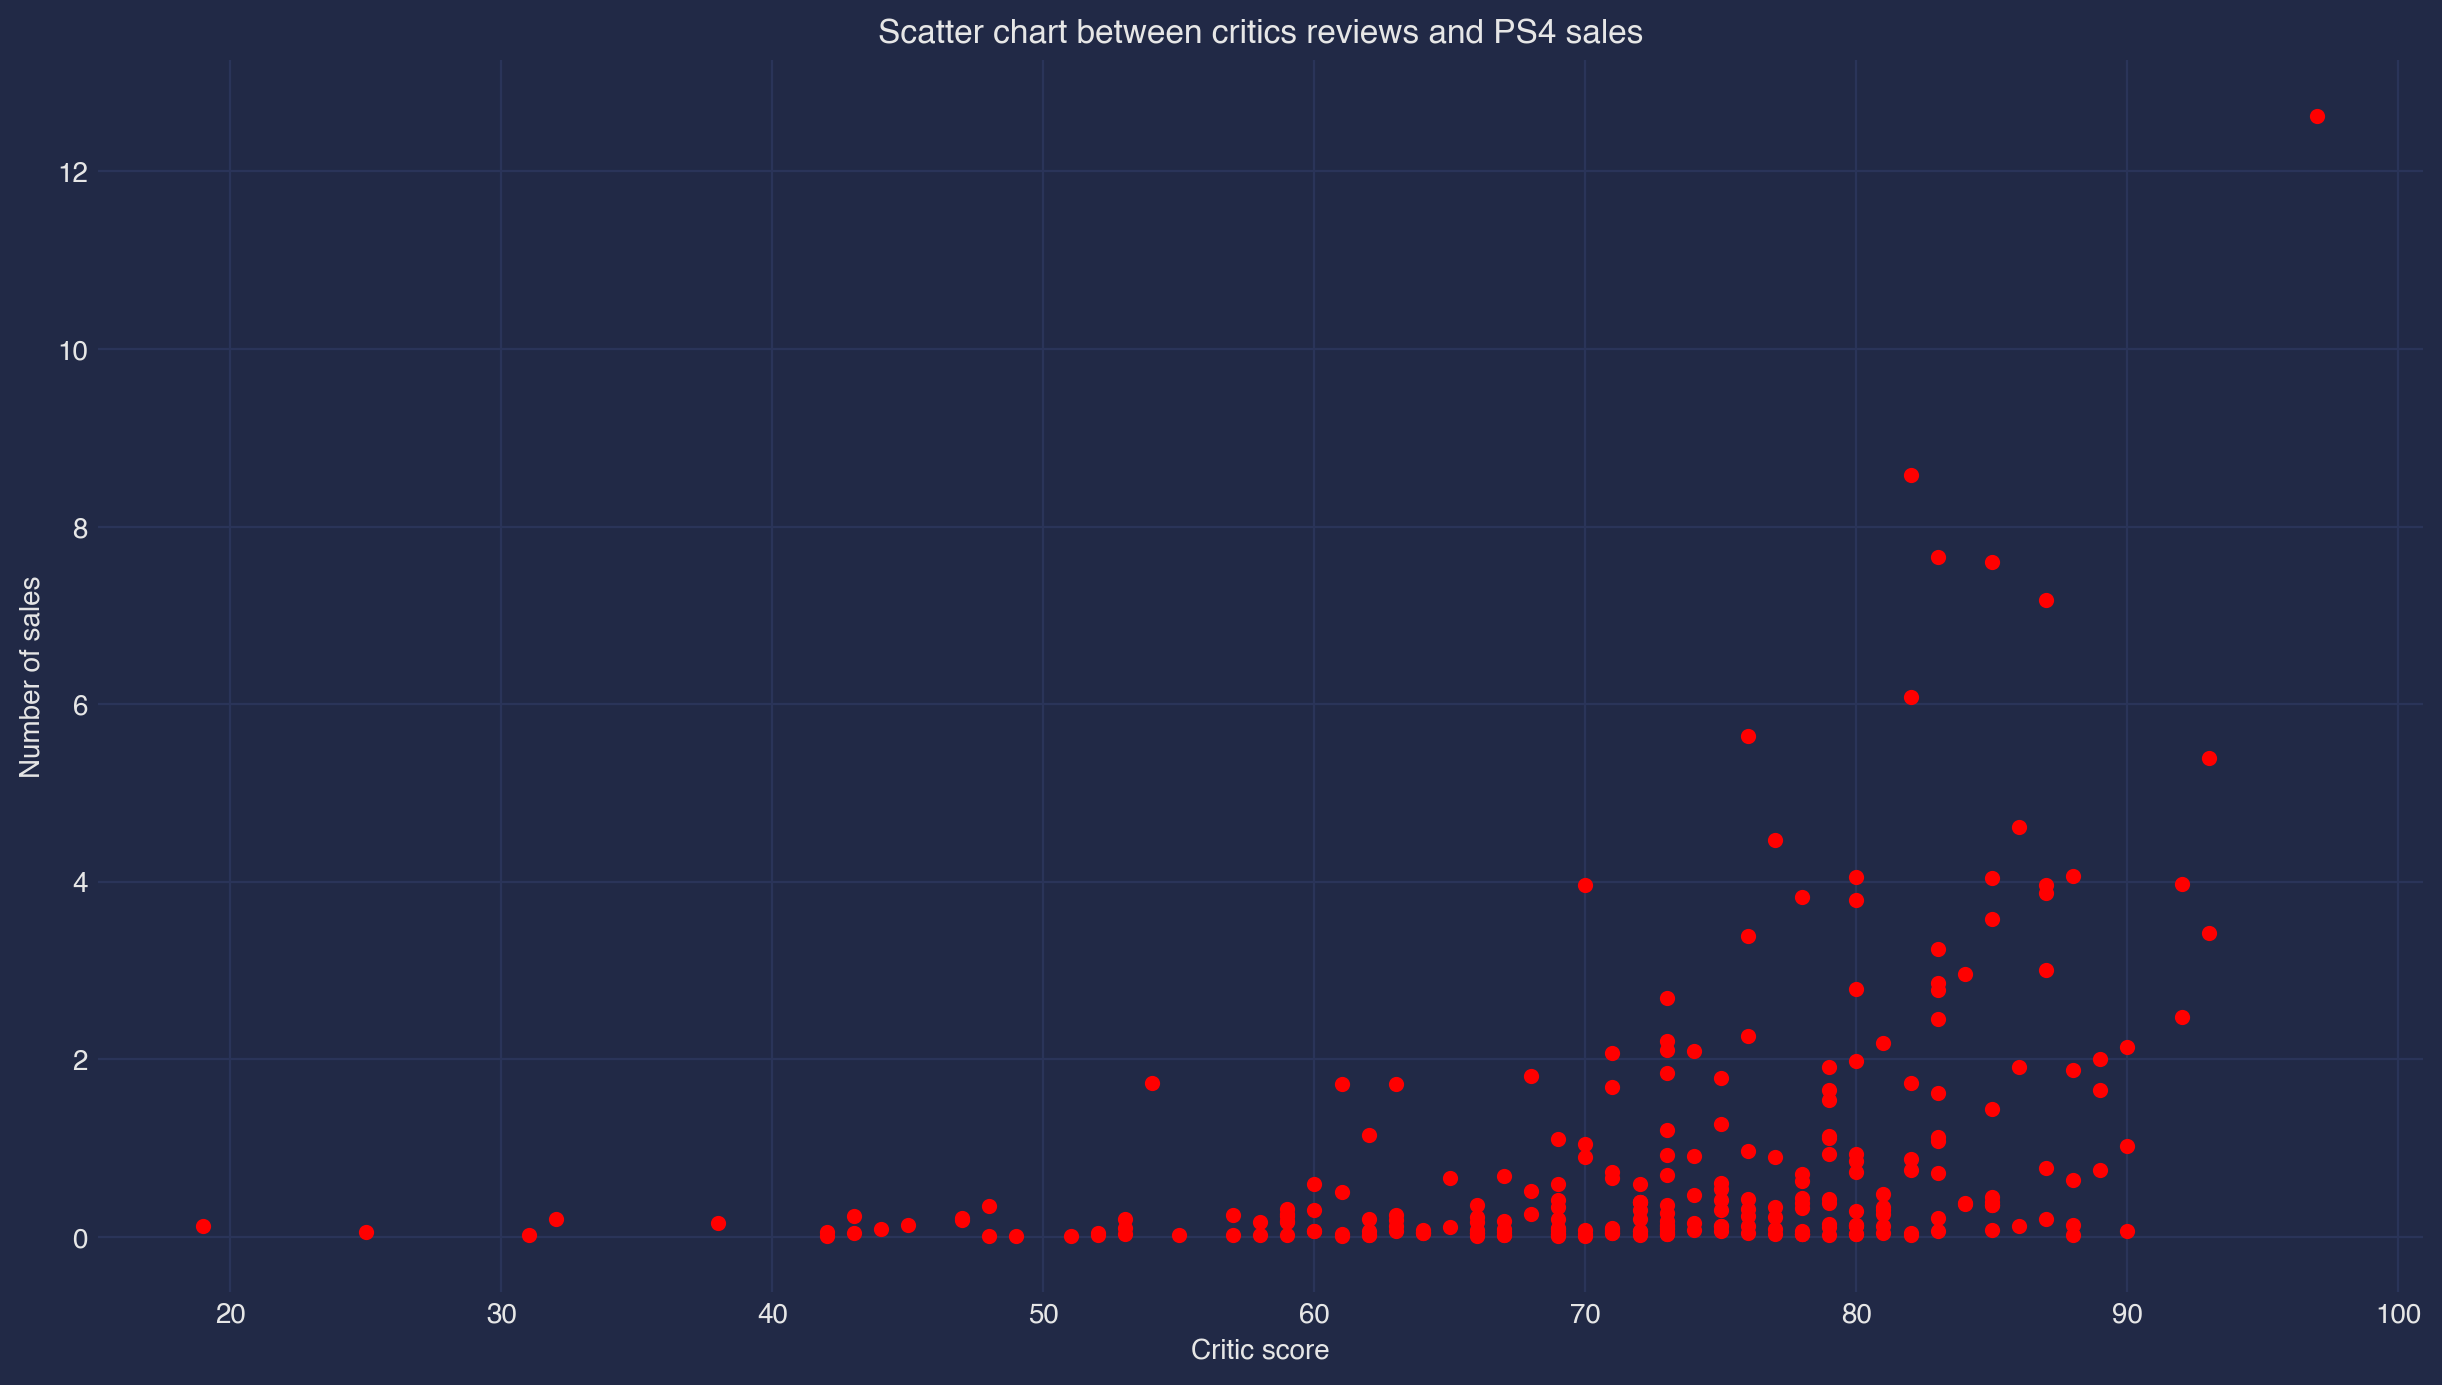

In [126]:
#building a scattering
data_PS4_corr.plot(kind='scatter', y='all_sales' , x='critic_score', alpha=1, subplots=True, figsize=(15,8), c = 'r');
plt.xlabel('Critic score')
plt.ylabel('Number of sales')
plt.title('Scatter chart between critics reviews and PS4 sales');

In [128]:
#creating a new dataframe for calculating the Pearson correlation coefficient
data_PS3_corr = data.query('platform=="PS3"')

In [130]:
#removing all the passes
data_PS3_corr = data_PS3_corr[data_PS3_corr['critic_score'].isna()==False]

In [132]:
#changing the data type to float so that it doesn't give errors
data_PS3_corr['critic_score'] = data_PS3_corr['critic_score'].astype('float')

In [134]:
#calculating the Pearson correlation coefficient
data_PS3_corr['critic_score'].corr(data_PS3_corr['all_sales'])

0.3342853393371919

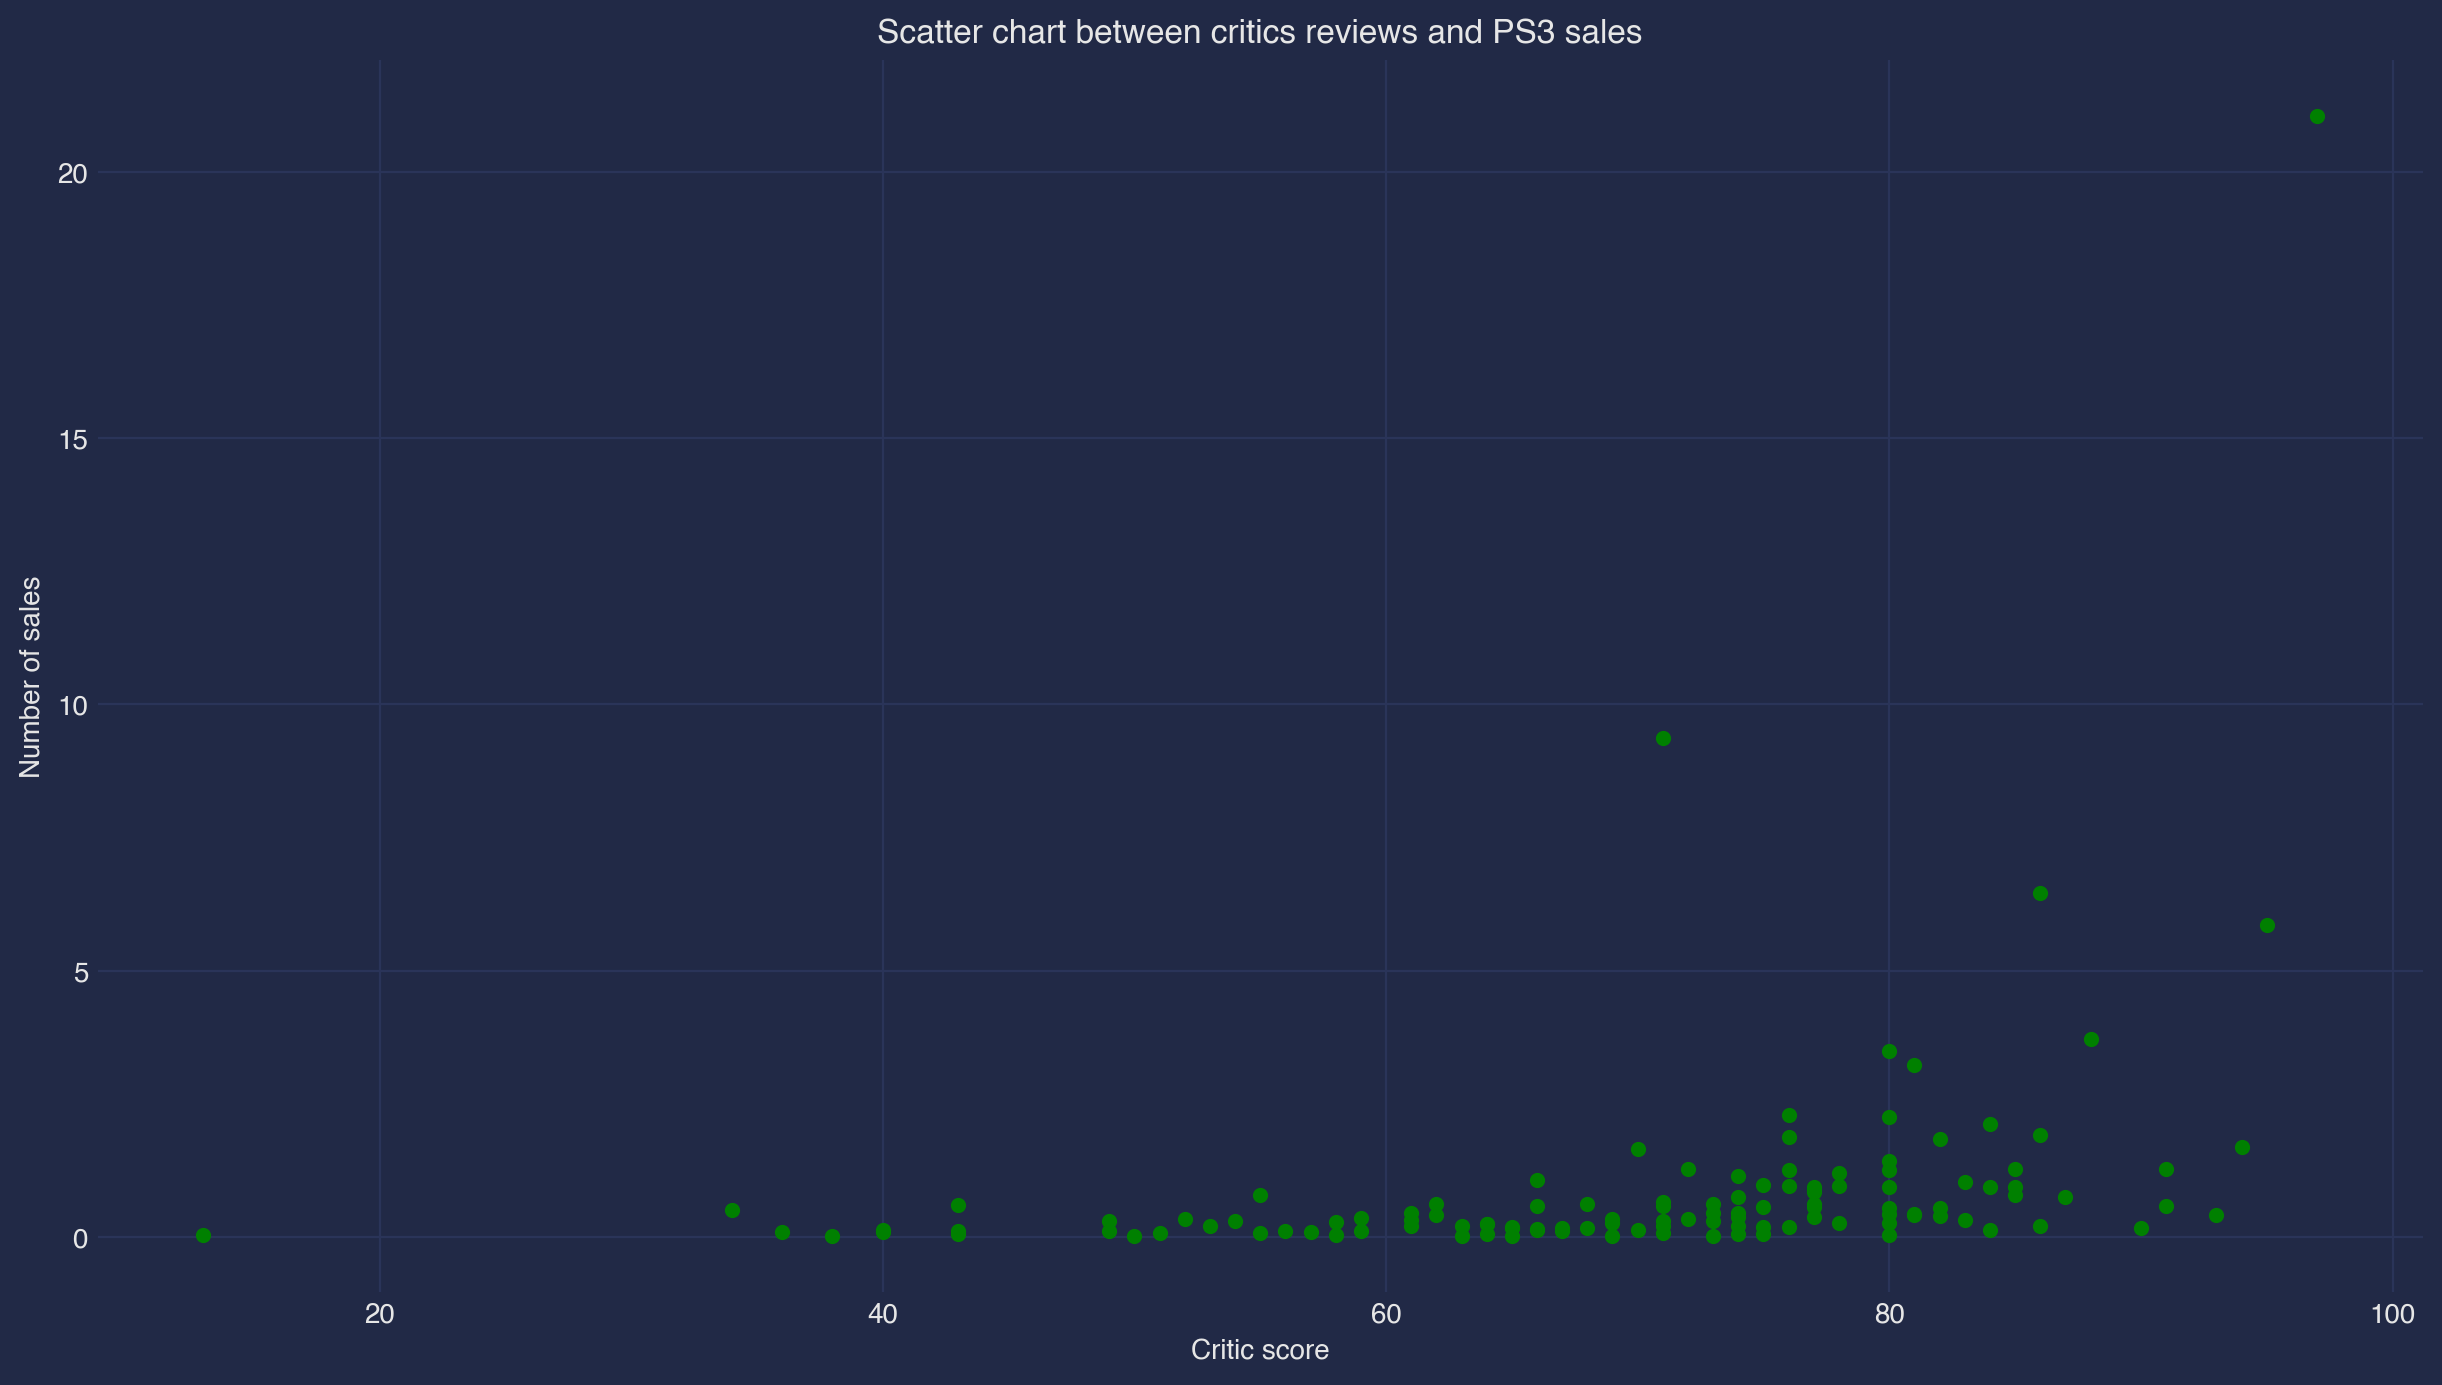

In [136]:
#building a scattering
data_PS3_corr.plot(kind='scatter', y='all_sales' , x='critic_score', alpha=1, subplots=True, figsize=(15,8), c = 'g');
plt.xlabel('Critic score')
plt.ylabel('Number of sales')
plt.title('Scatter chart between critics reviews and PS3 sales');

In [138]:
#creating a new dataframe for calculating the Pearson correlation coefficient
data_xone_corr = data.query('platform=="XOne"')

In [140]:
#removing all the passes
data_xone_corr = data_xone_corr[data_xone_corr['critic_score'].isna()==False]

In [142]:
#changing the data type to float so that it doesn't give errors
data_xone_corr['critic_score'] = data_xone_corr['critic_score'].astype('float')

In [144]:
#сcalculating the Pearson correlation coefficient
data_xone_corr['critic_score'].corr(data_xone_corr['all_sales'])

0.4169983280084017

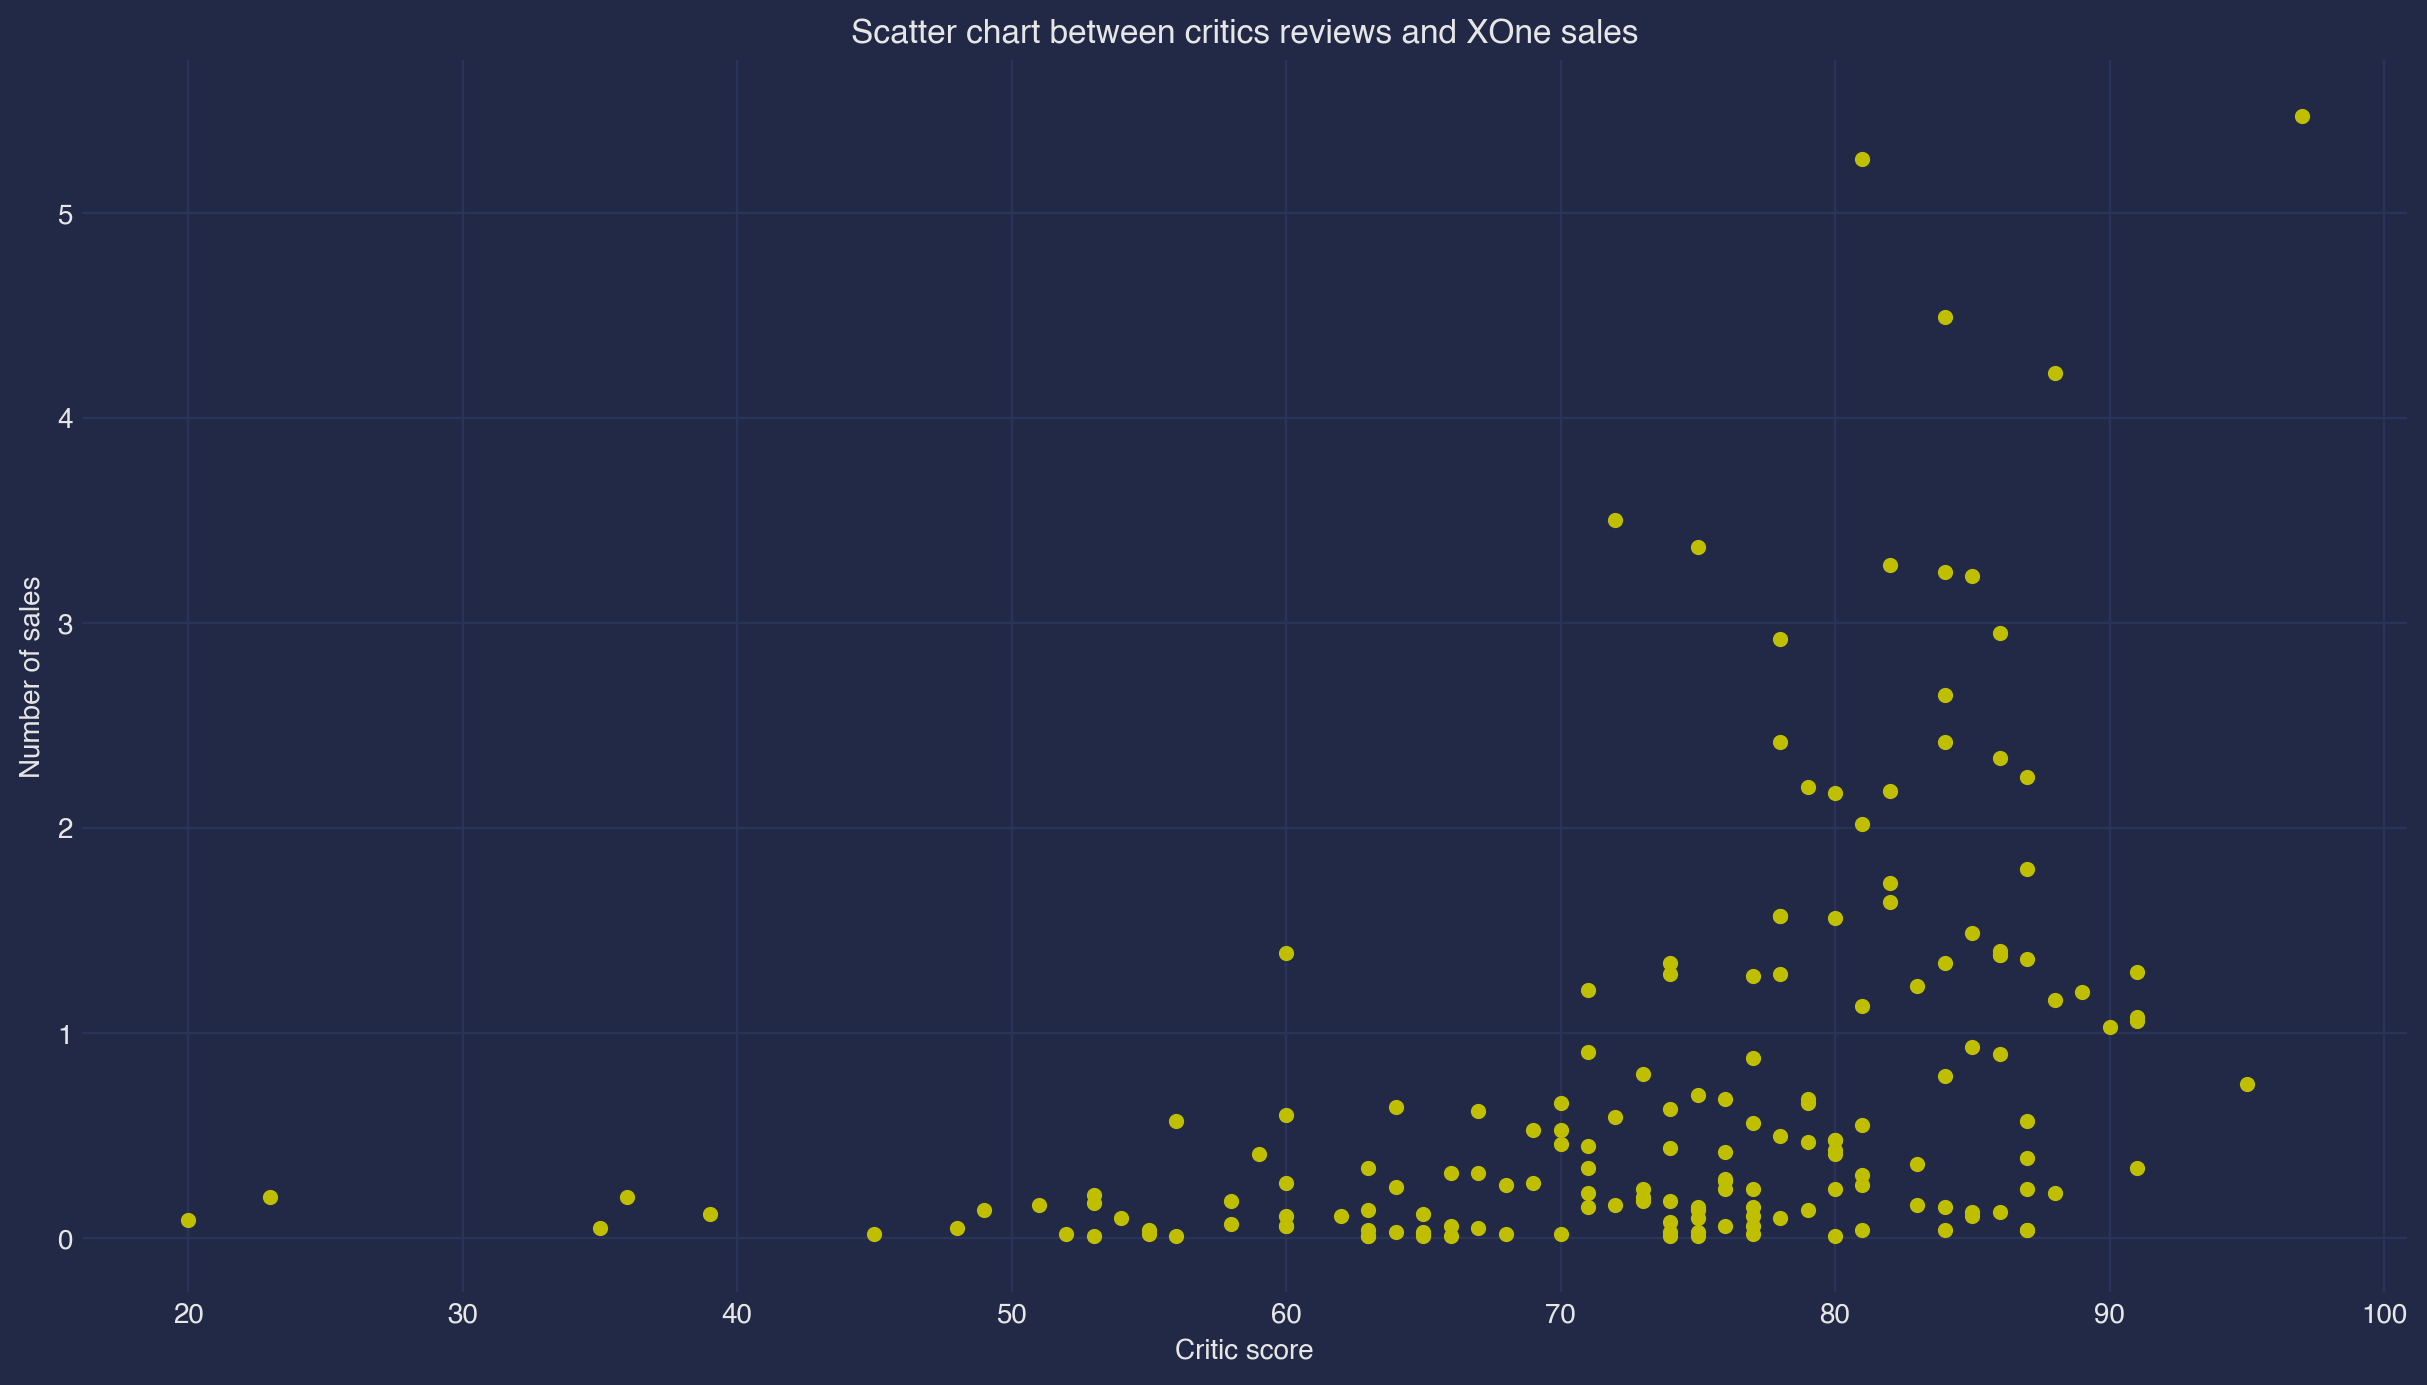

In [146]:
#building a scattering
data_xone_corr.plot(kind='scatter', y='all_sales' , x='critic_score', alpha=1, subplots=True, figsize=(15,8), c = 'y');
plt.xlabel('Critic score')
plt.ylabel('Number of sales')
plt.title('Scatter chart between critics reviews and XOne sales');

### Step 4.6. Conclusion: The correlation coefficient between the number of sales and the critical rating of the PS4, PS3 and XOne platforms is positive, but not more than 0.5. This means that these two indicators are related and depend on each other, but not very much

## Step 4.7. Comparing the correlation coefficients between the number of sales and the critics' rating

In [150]:
#building a table according to which it will be possible to find the relationship between the critics' rating and the number of sales.
data[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'all_sales']].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,all_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225,0.064322,-0.117878
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367,0.301130,0.922617
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796,0.280785,0.928031
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192,0.134143,0.434394
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000,0.275289,0.921370
critic_score,0.064322,0.301130,0.280785,0.134143,0.275289,1.000000,0.313700
all_sales,-0.117878,0.922617,0.928031,0.434394,0.921370,0.313700,1.000000


### Step 4.7. Conclusion: the overall correlation coefficient between the number of sales and the critical rating and the correlation coefficient between the number of sales and the critical rating of the most popular platforms are approximately similar. It can be concluded that the critics' assessment affects the game's marketability, but not very much.

## Step 4.8. Create a scatter plot and calculate the correlation coefficient between user reviews and sales within several popular platforms. For research, I'll take the PS4, PS3 and XOne platforms.

In [154]:
#changing the data type to float
data['user_score'] = pd.to_numeric(data['user_score'])

/var/folders/j1/s87kb4rs25s6jmdt61g1wsxr0000gn/T/ipykernel_46417/3853616233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = pd.to_numeric(data['user_score'])


In [156]:
#checking that everything worked out
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               2233 non-null   object 
 1   platform                           2233 non-null   object 
 2   year_of_release                    2233 non-null   Int64  
 3   genre                              2233 non-null   object 
 4   na_sales                           2233 non-null   float64
 5   eu_sales                           2233 non-null   float64
 6   jp_sales                           2233 non-null   float64
 7   other_sales                        2233 non-null   float64
 8   critic_score                       991 non-null    Int64  
 9   user_score                         2233 non-null   float64
 10  rating                             1256 non-null   object 
 11  all_sales                          2233 non-null   float64


In [158]:
#creating a new dataframe for calculating the Pearson correlation coefficient
data_PS4_corr = data.query('platform=="PS4"')

In [160]:
#removing all the zeros
data_PS4_corr = data_PS4_corr[data_PS4_corr['user_score']!=0]

In [162]:
#calculating the Pearson correlation coefficient
data_PS4_corr['user_score'].corr(data_PS4_corr['all_sales'])

-0.03195711020455643

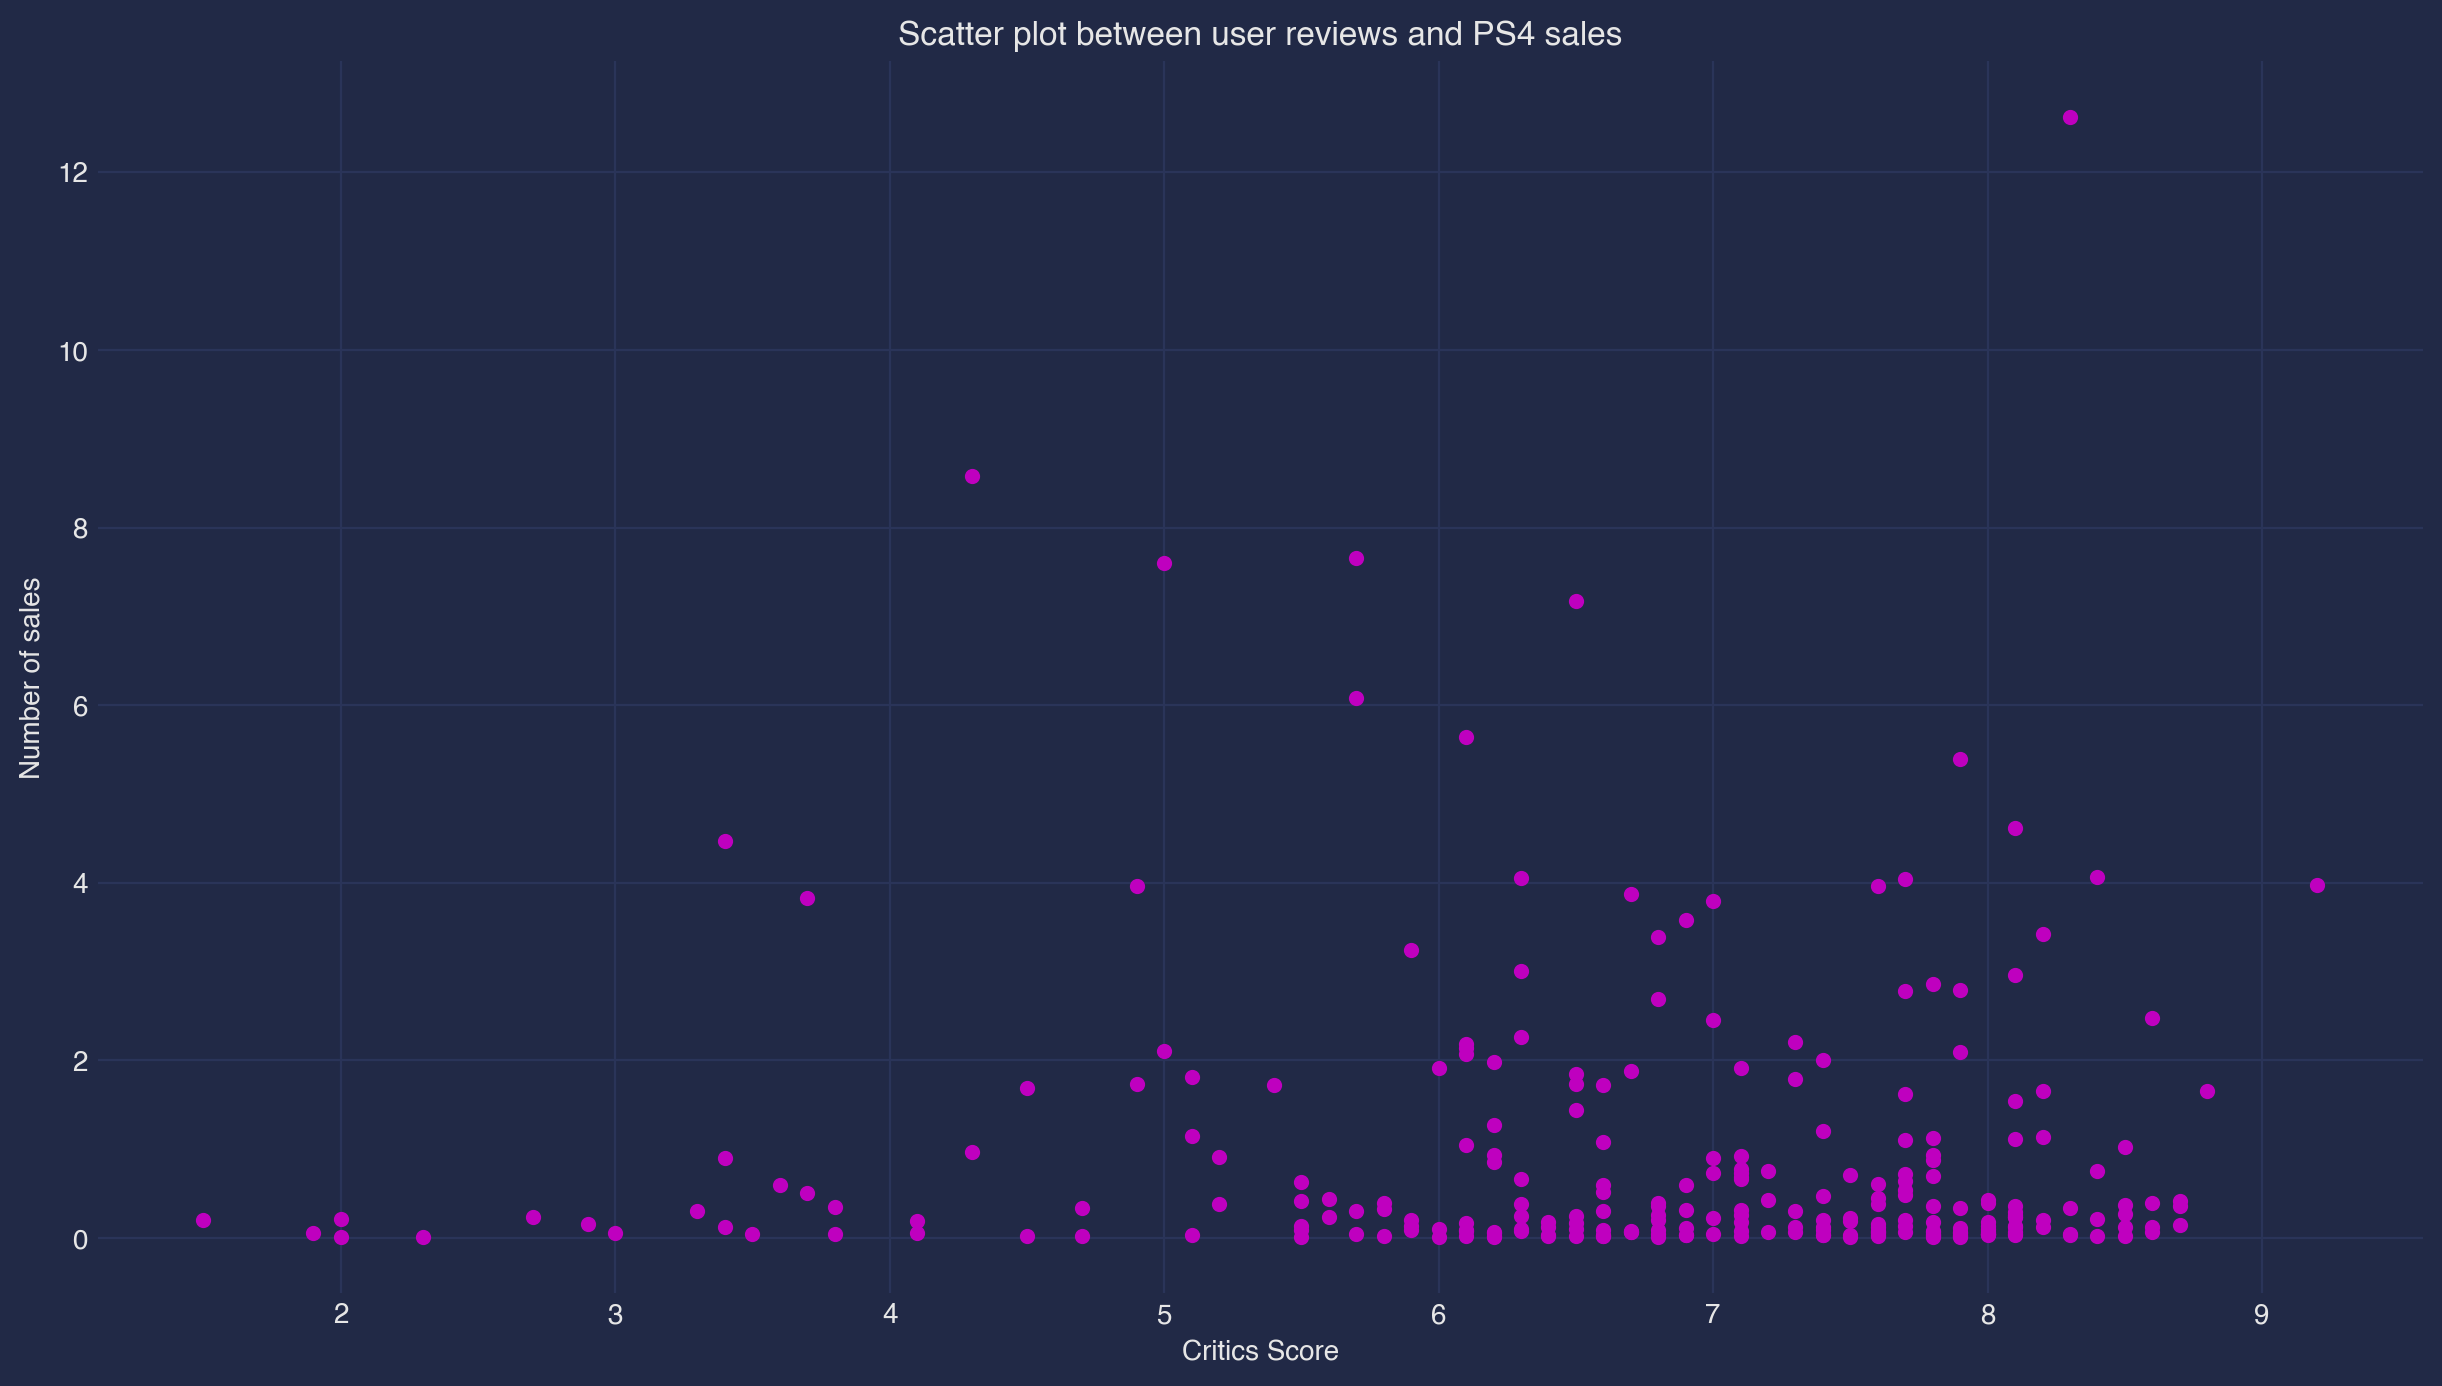

In [168]:
#building a scattering diagram 
data_PS4_corr.plot(kind='scatter', y='all_sales' , x='user_score', alpha=1, subplots=True, figsize=(15, 8), c = 'm');
plt.xlabel('Critics Score')
plt.ylabel('Number of sales')
plt.title('Scatter plot between user reviews and PS4 sales');

In [170]:
#creating a new dataframe for calculating the Pearson correlation coefficient
data_PS3_corr = data.query('platform=="PS3"')

In [172]:
#removing all the zeros
data_PS3_corr = data_PS3_corr[data_PS3_corr['user_score']!=0]

In [174]:
#calculating the Pearson correlation coefficient
data_PS3_corr['user_score'].corr(data_PS3_corr['all_sales'])

0.0023944027357566907

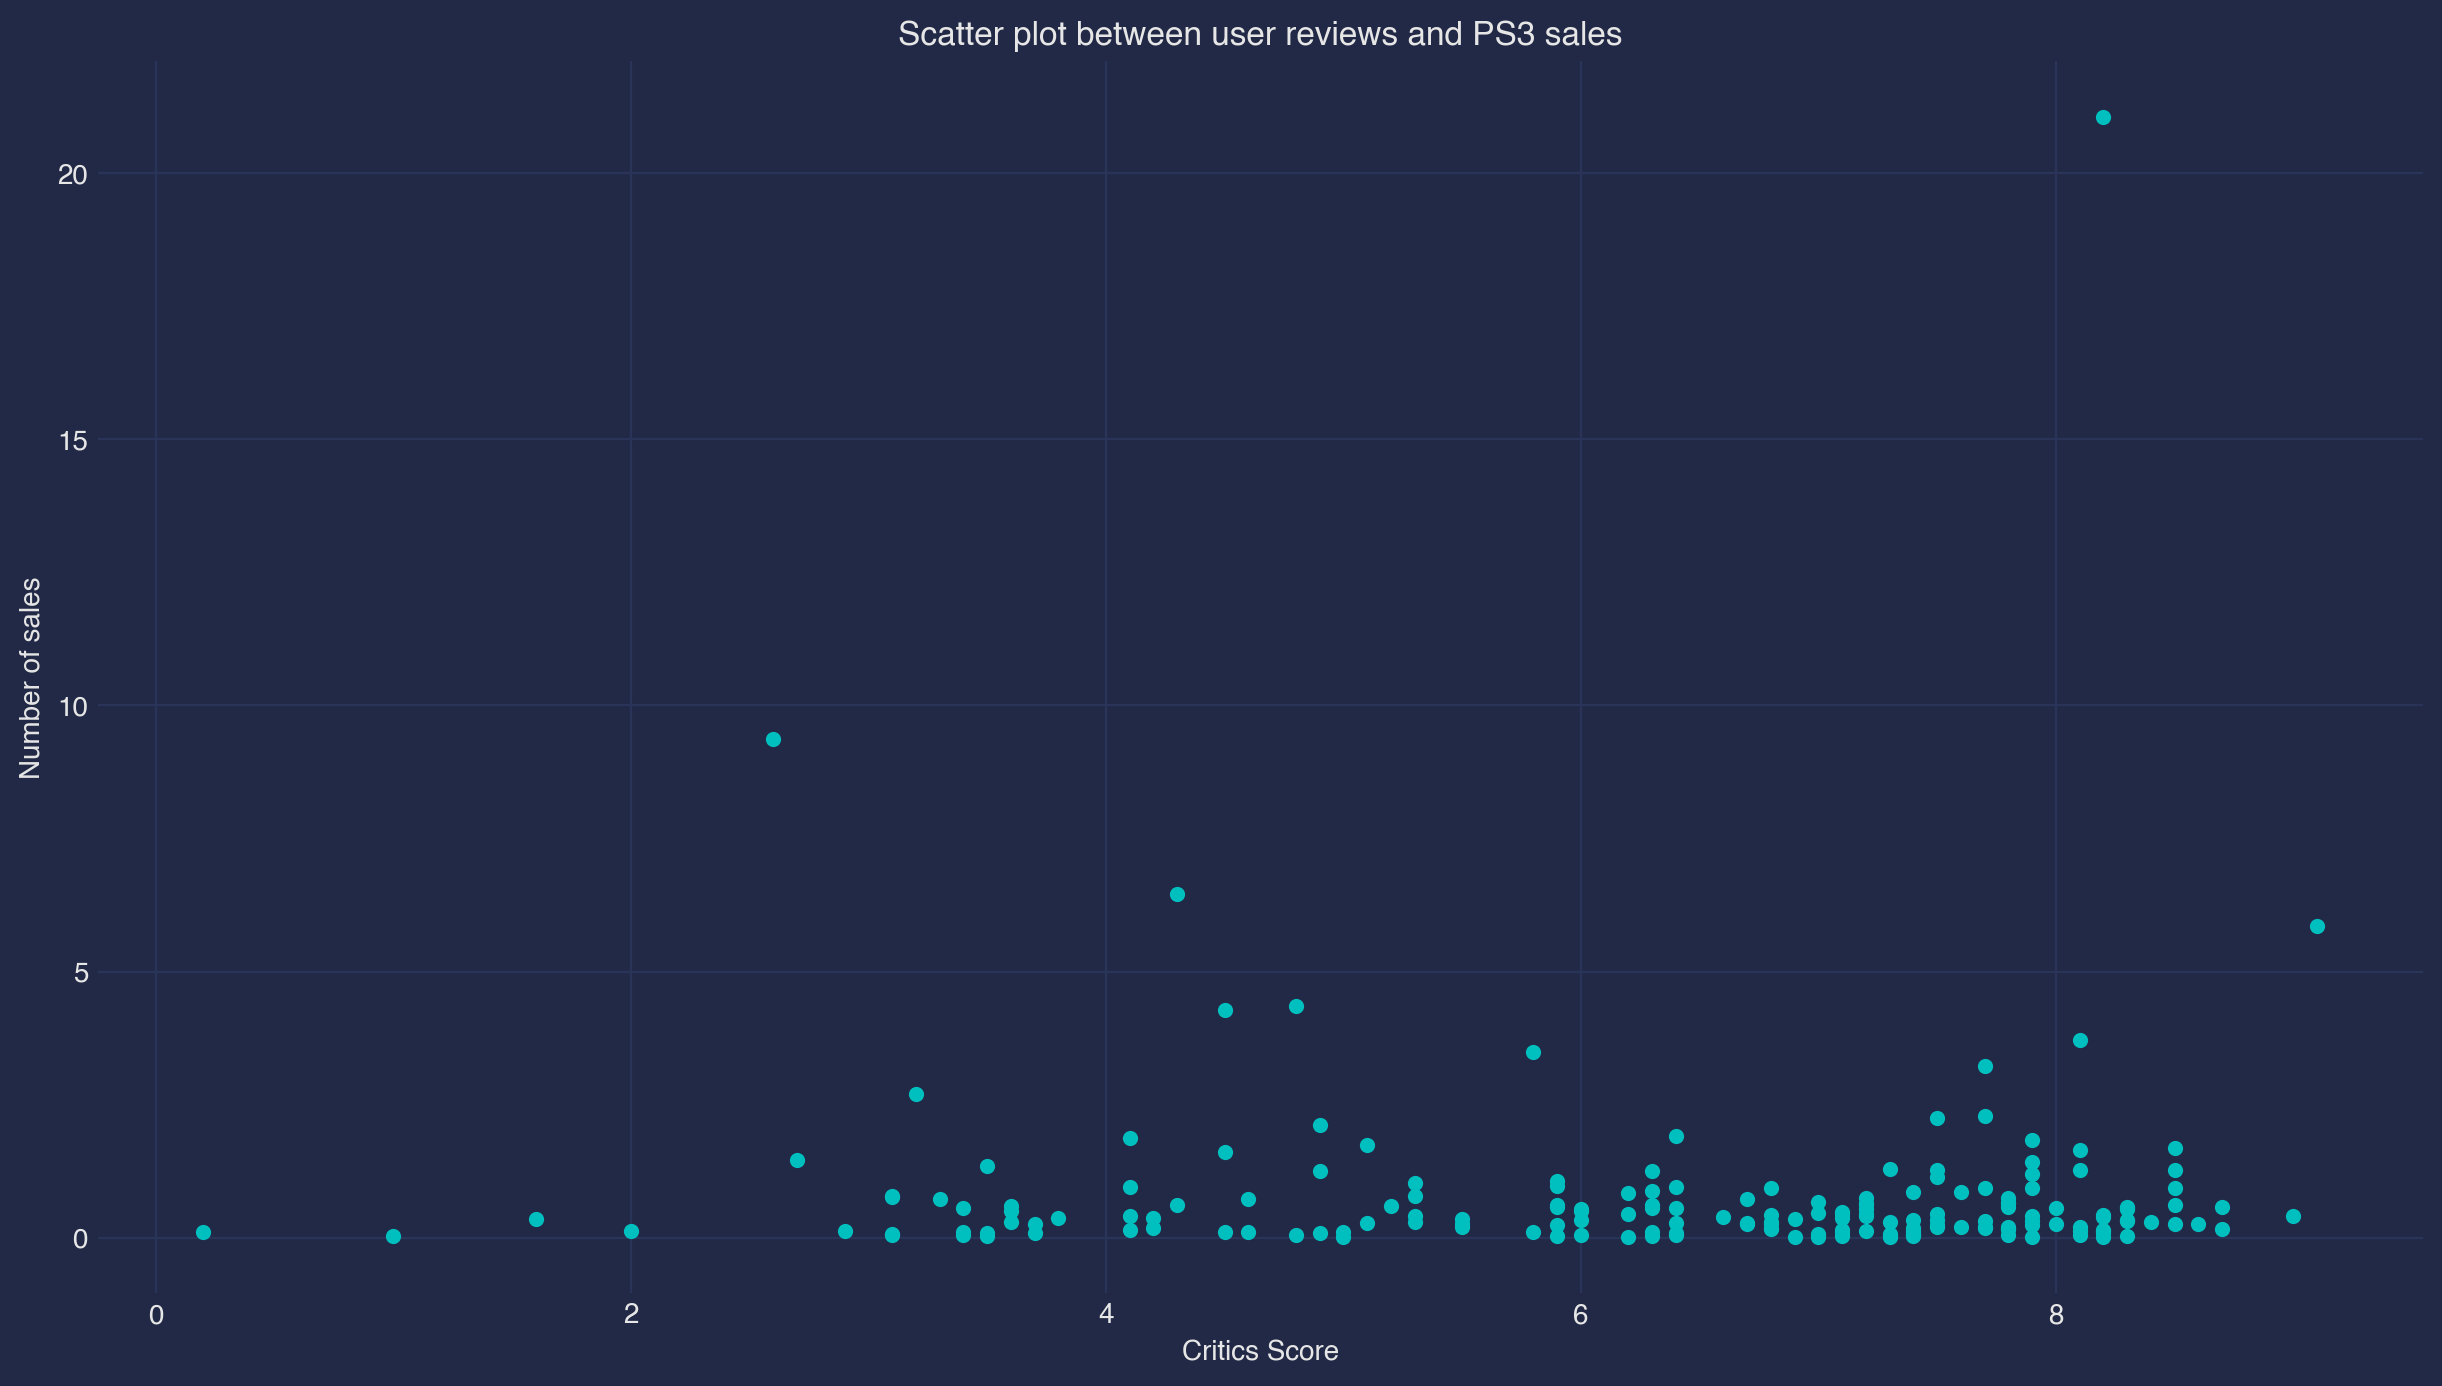

In [178]:
#building a scattering diagram 
data_PS3_corr.plot(kind='scatter', y='all_sales' , x='user_score', alpha=1, subplots=True, figsize=(15, 8), c = 'c');
plt.xlabel('Critics Score')
plt.ylabel('Number of sales')
plt.title('Scatter plot between user reviews and PS3 sales');

In [180]:
#creating a new dataframe for calculating the Pearson correlation coefficient
data_xone_corr = data.query('platform=="XOne"')

In [182]:
#removing all the zeros
data_xone_corr = data_xone_corr[data_xone_corr['user_score']!=0]

In [184]:
#calculating the Pearson correlation coefficient
data_xone_corr['user_score'].corr(data_xone_corr['all_sales'])

-0.06892505328279416

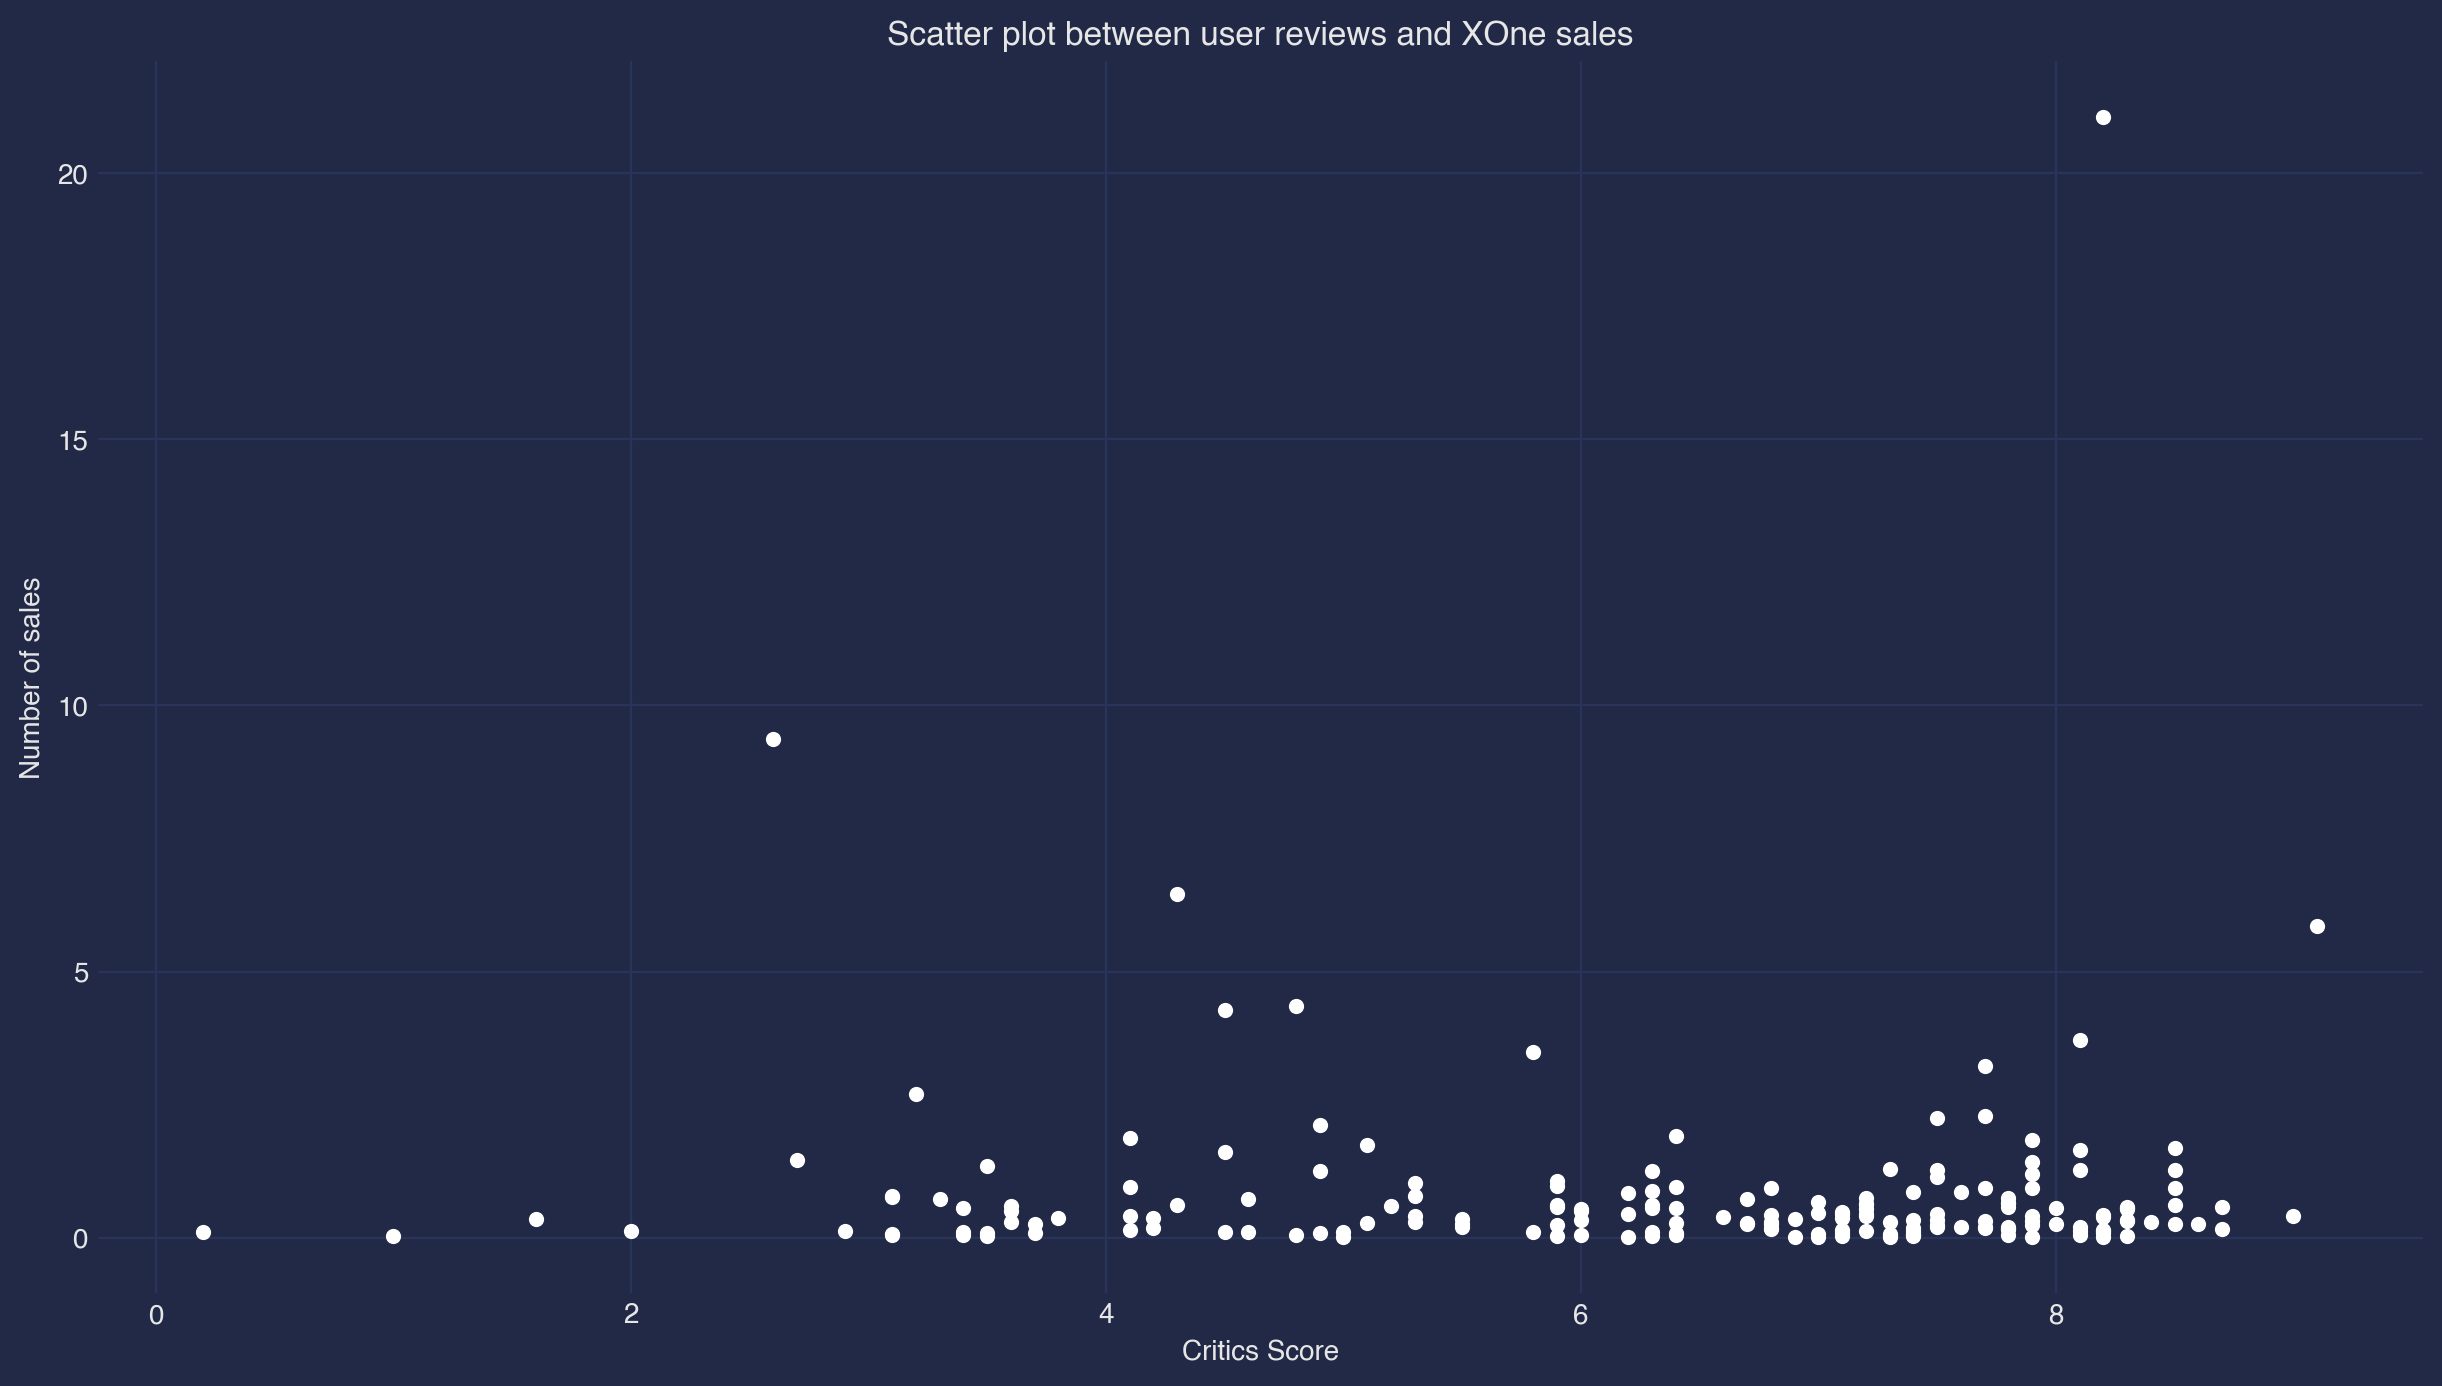

In [188]:
#building a scattering diagram 
data_PS3_corr.plot(kind='scatter', y='all_sales' , x='user_score', alpha=1, subplots=True, figsize=(15, 8), c = 'w');
plt.xlabel('Critics Score')
plt.ylabel('Number of sales')
plt.title('Scatter plot between user reviews and XOne sales');

### Step 4.8. Conclusion: The correlation coefficient between the number of sales and user ratings for the most popular platforms is almost zero. This means that there is no dependency between these two parameters.

## Step 4.9. Comparing the correlation coefficients between the number of sales and the user rating

In [192]:
#сcreate a table using which it will be possible to find the relationship between the user rating and the number of sales
data_corr = data[data['user_score']!=0]
data_corr['all_sales'].corr(data_corr['user_score'])

-0.0026078133545982688

### Step 4.9. Conclusion: the overall correlation coefficient between the number of sales and user ratings and the correlation coefficient between the number of sales and critical ratings of the most popular platforms are approximately similar. It can be concluded that user ratings do not affect the game's marketability.

In [195]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               2233 non-null   object 
 1   platform                           2233 non-null   object 
 2   year_of_release                    2233 non-null   Int64  
 3   genre                              2233 non-null   object 
 4   na_sales                           2233 non-null   float64
 5   eu_sales                           2233 non-null   float64
 6   jp_sales                           2233 non-null   float64
 7   other_sales                        2233 non-null   float64
 8   critic_score                       991 non-null    Int64  
 9   user_score                         2233 non-null   float64
 10  rating                             1256 non-null   object 
 11  all_sales                          2233 non-null   float64


## Step 4.10. General distribution of games by genre

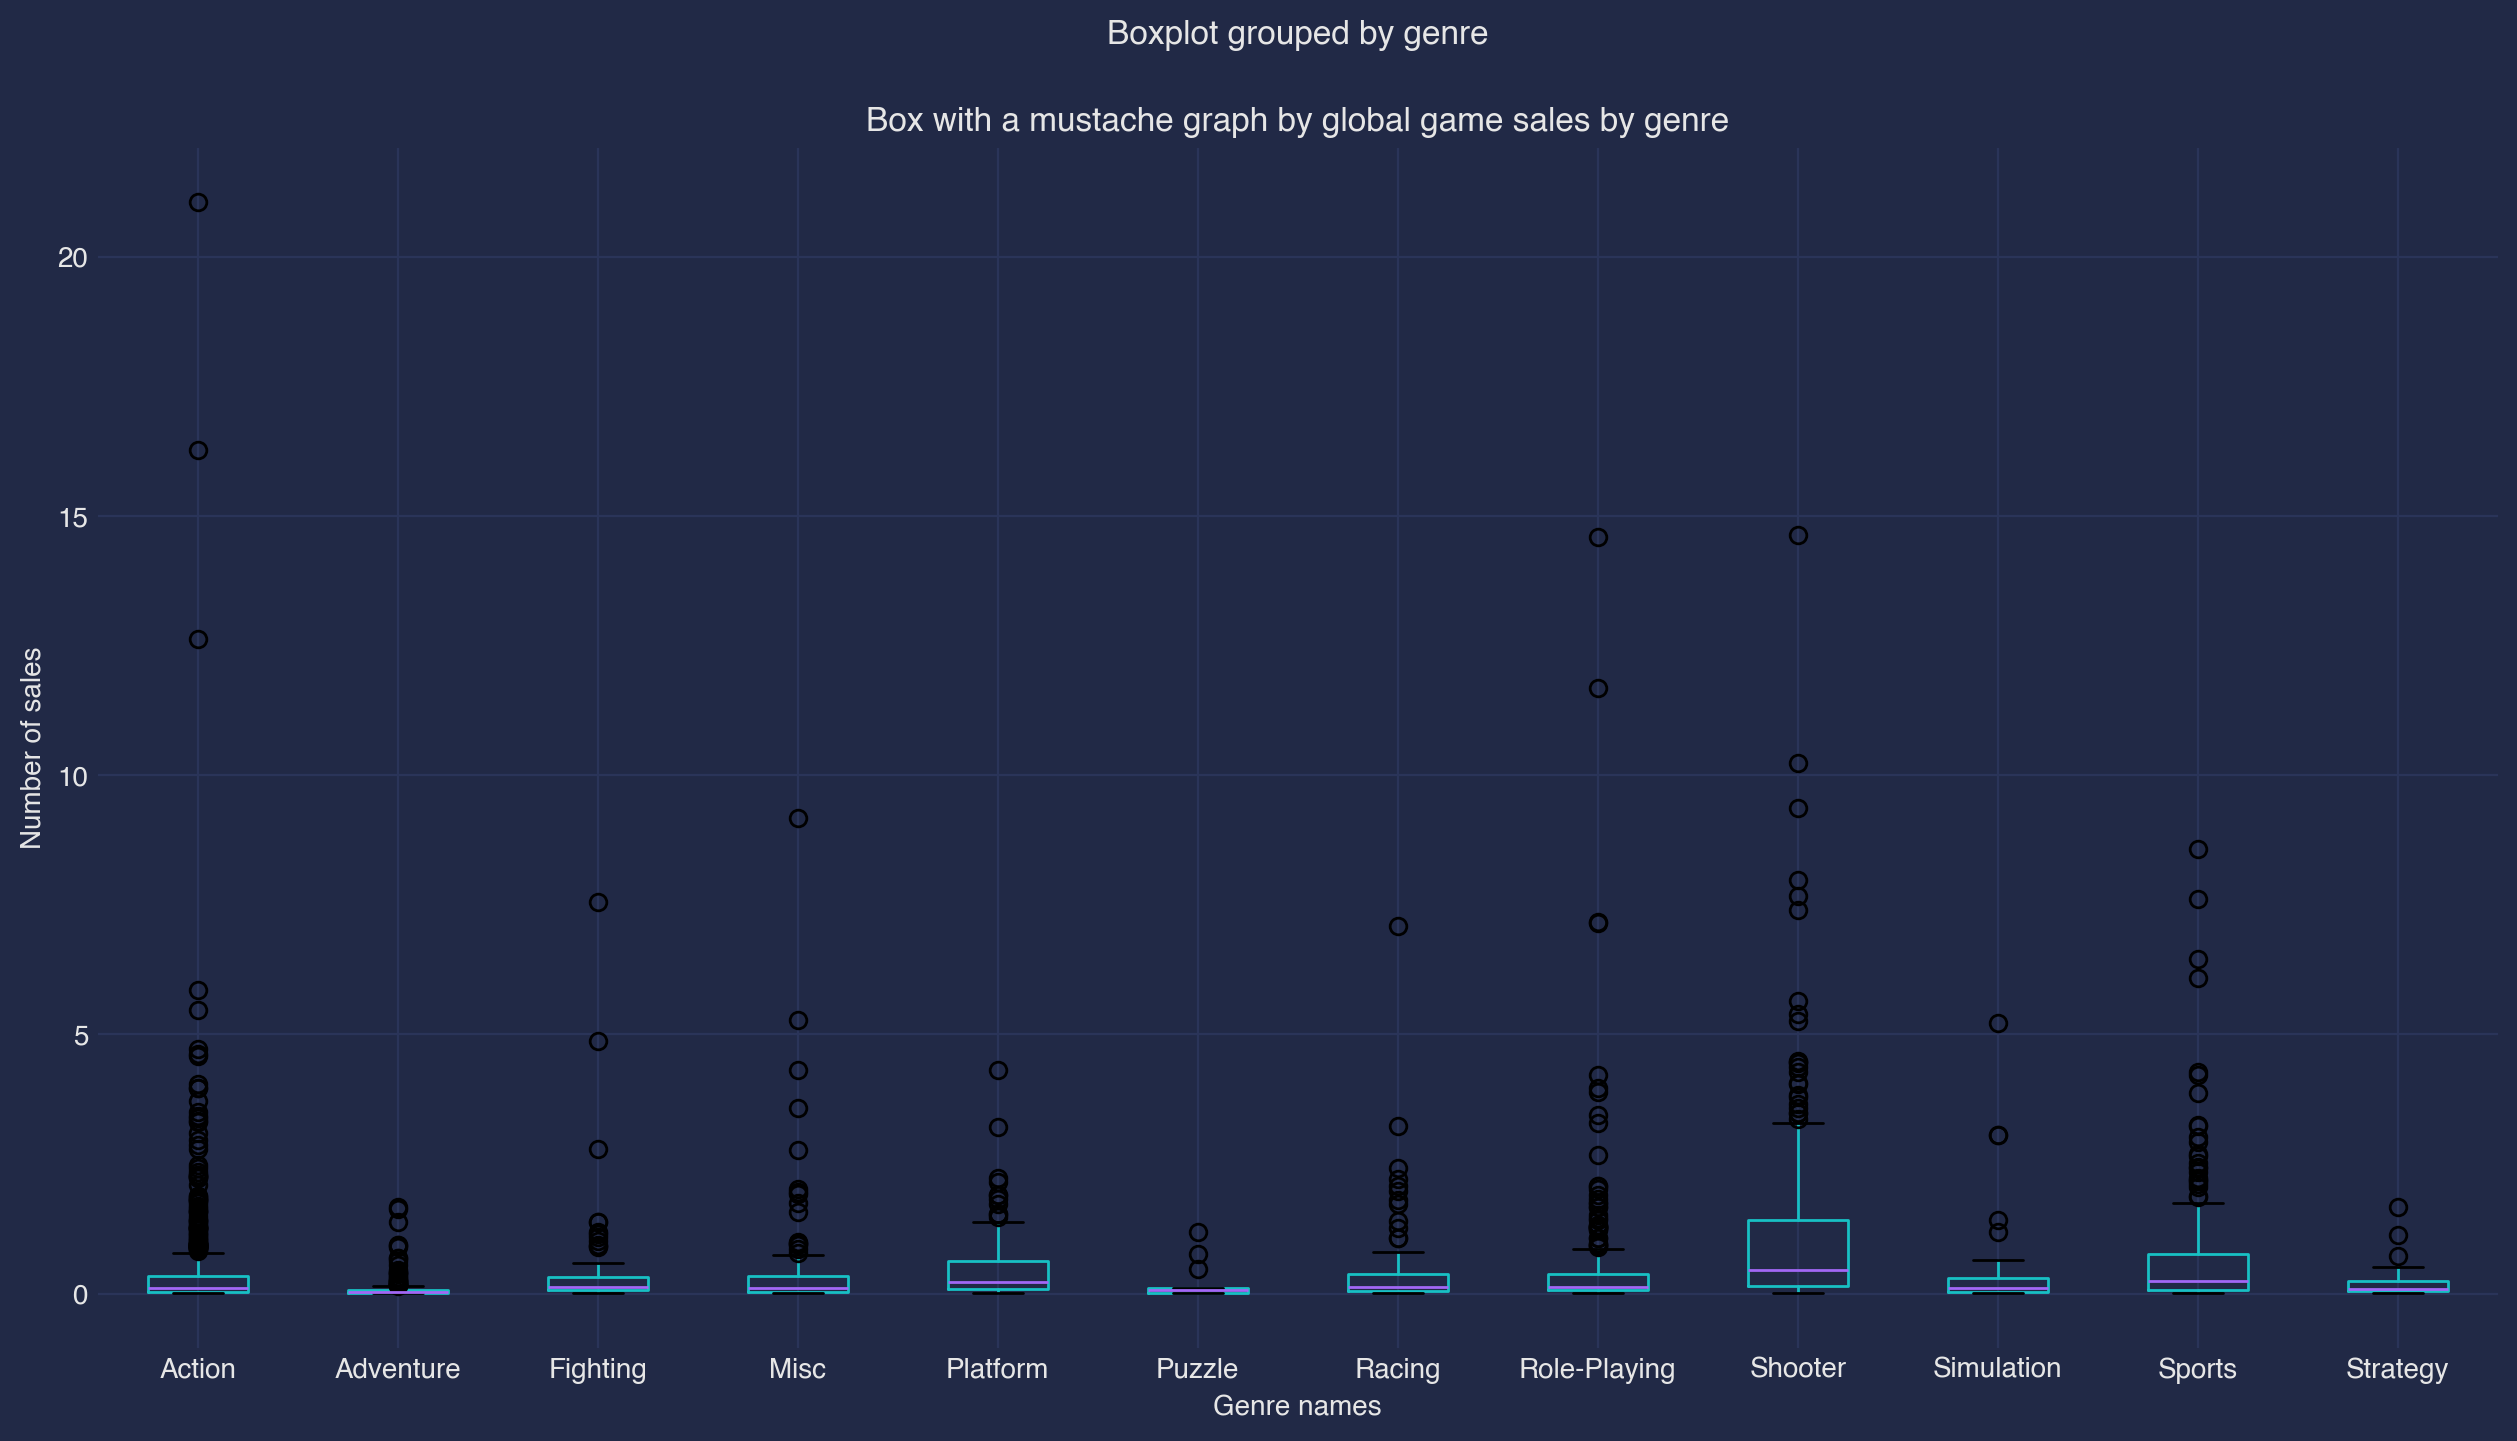

In [198]:
#creating a box with a mustache graph
data.boxplot('all_sales', by='genre', figsize=(15, 8));
plt.xlabel('Genre names')
plt.ylabel('Number of sales')
plt.title('Box with a mustache graph by global game sales by genre');

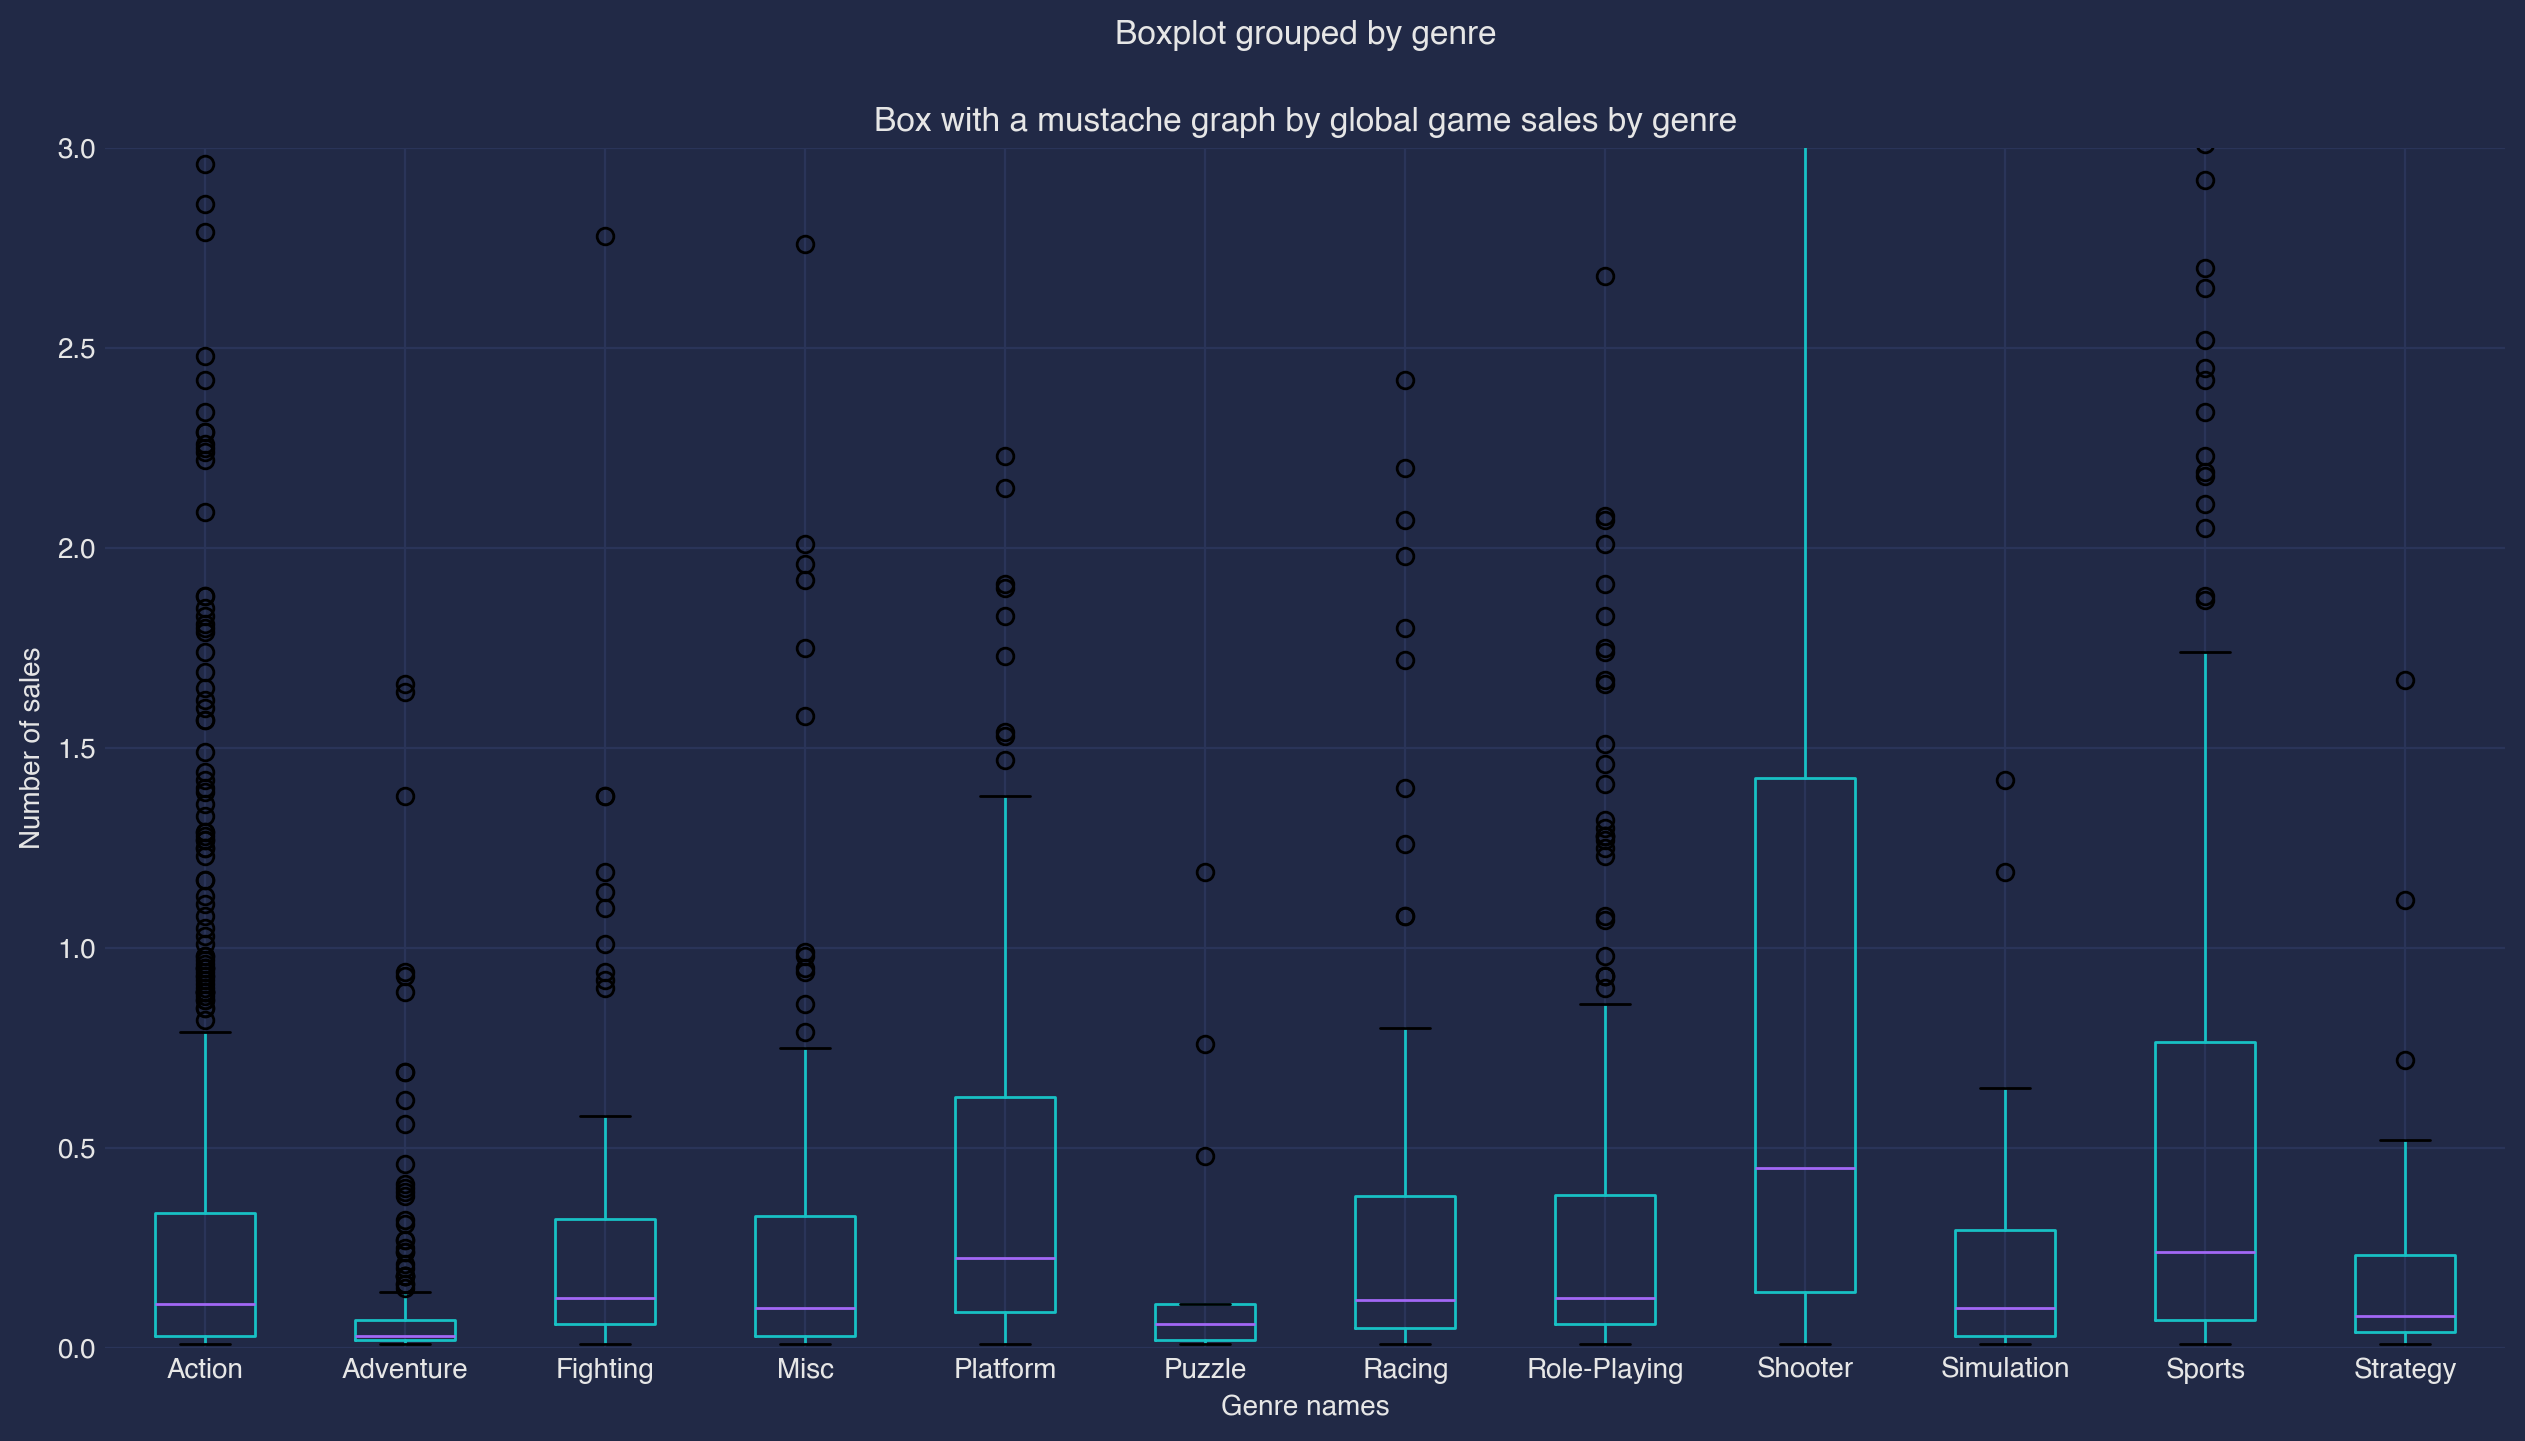

In [200]:
#creating a box with a mustache graph
data.boxplot('all_sales', by='genre', figsize=(15, 8));
plt.xlabel('Genre names')
plt.ylabel('Number of sales')
plt.title('Box with a mustache graph by global game sales by genre');
plt.ylim(0, 3);

### Step 4.9. Conclusion: The Action genre sells the most. Genres with high and low sales stand out

# Step 5. Creating a portrait of the user of each region

## Step 5.1. The most popular platforms for each region

In [205]:
#creating a table for convenient construction of a circular graph
data_platformtop5_na = (
    data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
    
)
#creating a new row in which I will save the sales volume of platforms that did not make it to the top 5
data_platformtop5_na.loc[len(data_platformtop5_na.index)] = ['Other', 0]
other = 0
other += data_platformtop5_na[data_platformtop5_na['na_sales']<30]['na_sales'].sum()
data_platformtop5_na.loc[data_platformtop5_na['platform']=='Other', 'na_sales'] = other
data_platformtop5_na = data_platformtop5_na[data_platformtop5_na['na_sales']>30]
#check
data_platformtop5_na

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
11,Other,52.49


In [207]:
#creating a table for convenient construction of a circular graph
data_platformtop5_eu = (
    data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)
#creating a new row in which I will save the sales volume of platforms that did not make it to the top 5
data_platformtop5_eu.loc[len(data_platformtop5_eu.index)] = ['Other', 0]
other = 0
other += data_platformtop5_eu[data_platformtop5_eu['eu_sales']<30]['eu_sales'].sum()
data_platformtop5_eu.loc[data_platformtop5_eu['platform']=='Other', 'eu_sales'] = other
data_platformtop5_eu = data_platformtop5_eu[data_platformtop5_eu['eu_sales']>30]
#check 
data_platformtop5_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
11,Other,58.26


In [209]:
#creating a table for convenient construction of a circular graph
data_platformtop5_jp = (
    data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)
#creating a new row in which I will save the sales volume of platforms that did not make it to the top 5
data_platformtop5_jp.loc[len(data_platformtop5_jp.index)] = ['Other', 0]
other = 0
other += data_platformtop5_jp[data_platformtop5_jp['jp_sales']<4]['jp_sales'].sum()
data_platformtop5_jp.loc[data_platformtop5_jp['platform']=='Other', 'jp_sales'] = other
data_platformtop5_jp = data_platformtop5_jp[data_platformtop5_jp['jp_sales']>4]
#check 
data_platformtop5_jp

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
11,Other,4.19


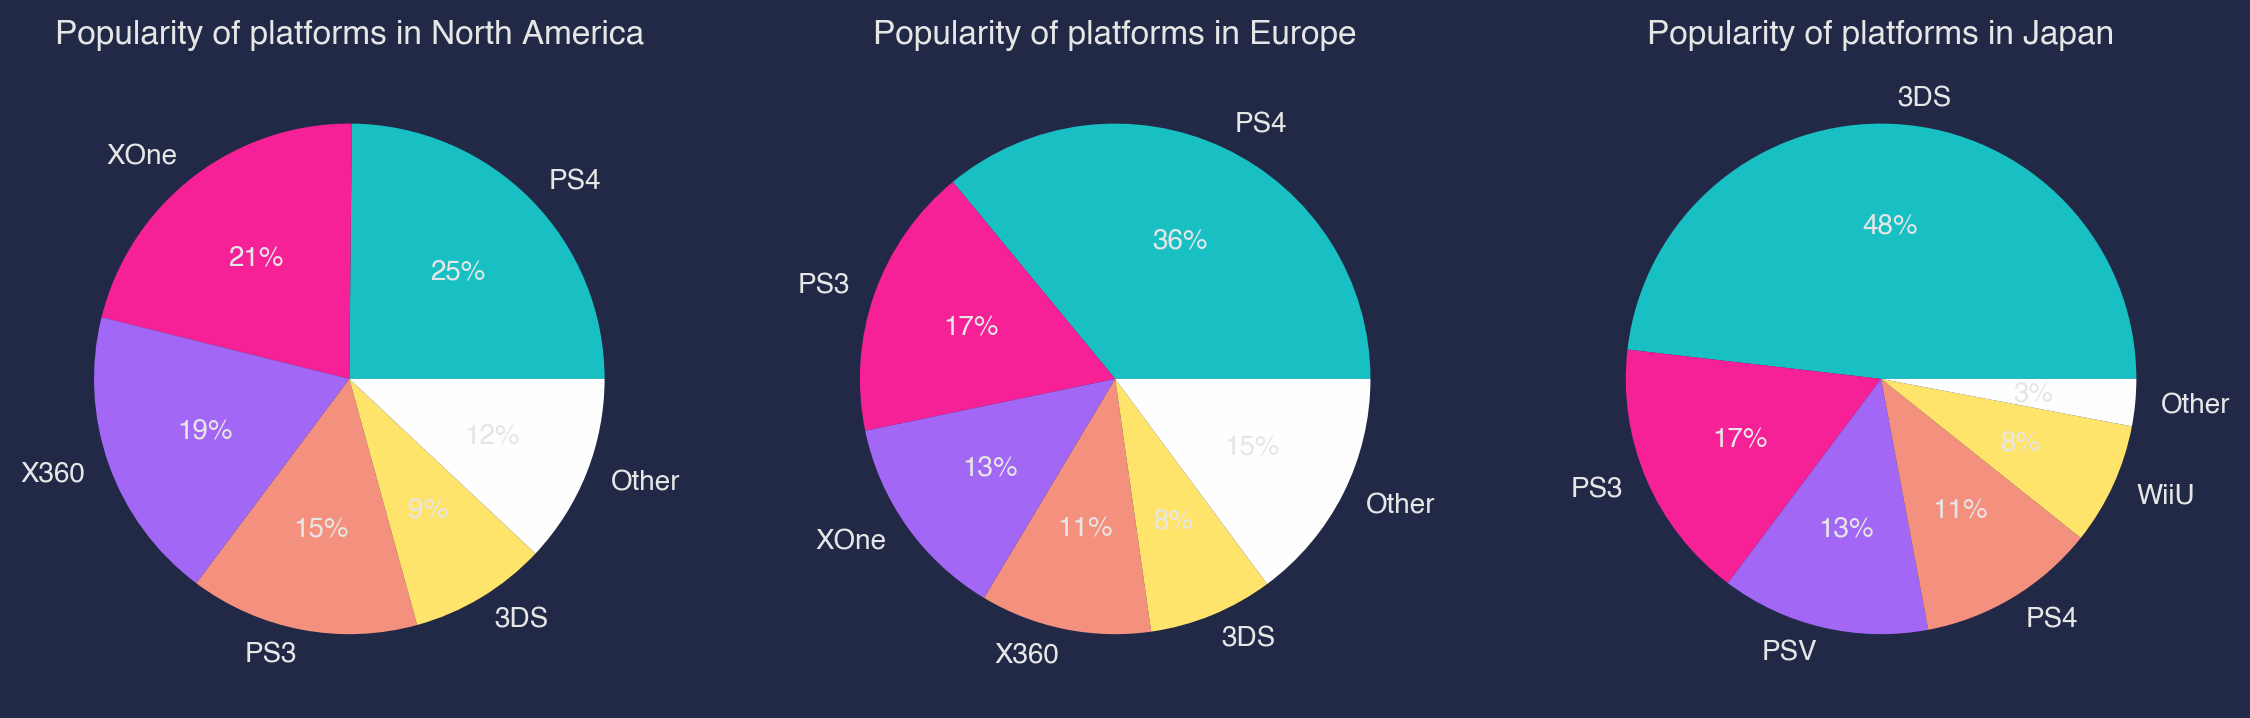

In [211]:
#standing three pie charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

data_platformtop5_na.plot(kind='pie', y='na_sales', labels=data_platformtop5_na['platform'], legend=False,
                         autopct='%.0f%%', ax=ax1)
ax1.set_ylabel('')
ax1.set_title('Popularity of platforms in North America')
data_platformtop5_eu.plot(kind='pie', y='eu_sales', labels=data_platformtop5_eu['platform'], legend=False,
                         autopct='%.0f%%', ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Popularity of platforms in Europe')
data_platformtop5_jp.plot(kind='pie', y='jp_sales', labels=data_platformtop5_jp['platform'], legend=False,
                         autopct='%.0f%%', ax=ax3)
ax3.set_ylabel('')
ax3.set_title('Popularity of platforms in Japan')
plt.show()

### Step 5.1. Conclusion: The most popular platform in North America is PS4, in Europe - PS4, and in Japan - 3DS

## Step 5.2. The most popular genres for each region

In [215]:
#creating a table for convenient construction of a circular graph
data_genretop5_na = (
    data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
    
)
#creating a new row in which I will save the sales volume of platforms that did not make it to the top 5
data_genretop5_na.loc[len(data_genretop5_na.index)] = ['Other', 0]
other = 0
other += data_genretop5_na[data_genretop5_na['na_sales']<20]['na_sales'].sum()
data_genretop5_na.loc[data_genretop5_na['genre']=='Other', 'na_sales'] = other
data_genretop5_na = data_genretop5_na[data_genretop5_na['na_sales']>20]
#check
data_genretop5_na

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
12,Other,62.76


In [217]:
#creating a table for convenient construction of a circular graph
data_genretop5_eu = (
    data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)
#creating a new row in which I will save the sales volume of platforms that did not make it to the top 5
data_genretop5_eu.loc[len(data_genretop5_eu.index)] = ['Other', 0]
other = 0
other += data_genretop5_eu[data_genretop5_eu['eu_sales']<20.1]['eu_sales'].sum()
data_genretop5_eu.loc[data_genretop5_eu['genre']=='Other', 'eu_sales'] = other
data_genretop5_eu = data_genretop5_eu[data_genretop5_eu['eu_sales']>20.1]
#check 
data_genretop5_eu

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
12,Other,68.56


In [219]:
#creating a table for convenient construction of a circular graph
data_genretop5_jp = (
    data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)
#creating a new row in which I will save the sales volume of platforms that did not make it to the top 5
data_genretop5_jp.loc[len(data_genretop5_jp.index)] = ['Other', 0]
other = 0
other += data_genretop5_jp[data_genretop5_jp['jp_sales']<6]['jp_sales'].sum()
data_genretop5_jp.loc[data_genretop5_jp['genre']=='Other', 'jp_sales'] = other
data_genretop5_jp = data_genretop5_jp[data_genretop5_jp['jp_sales']>6]
#check 
data_genretop5_jp

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
12,Other,25.79


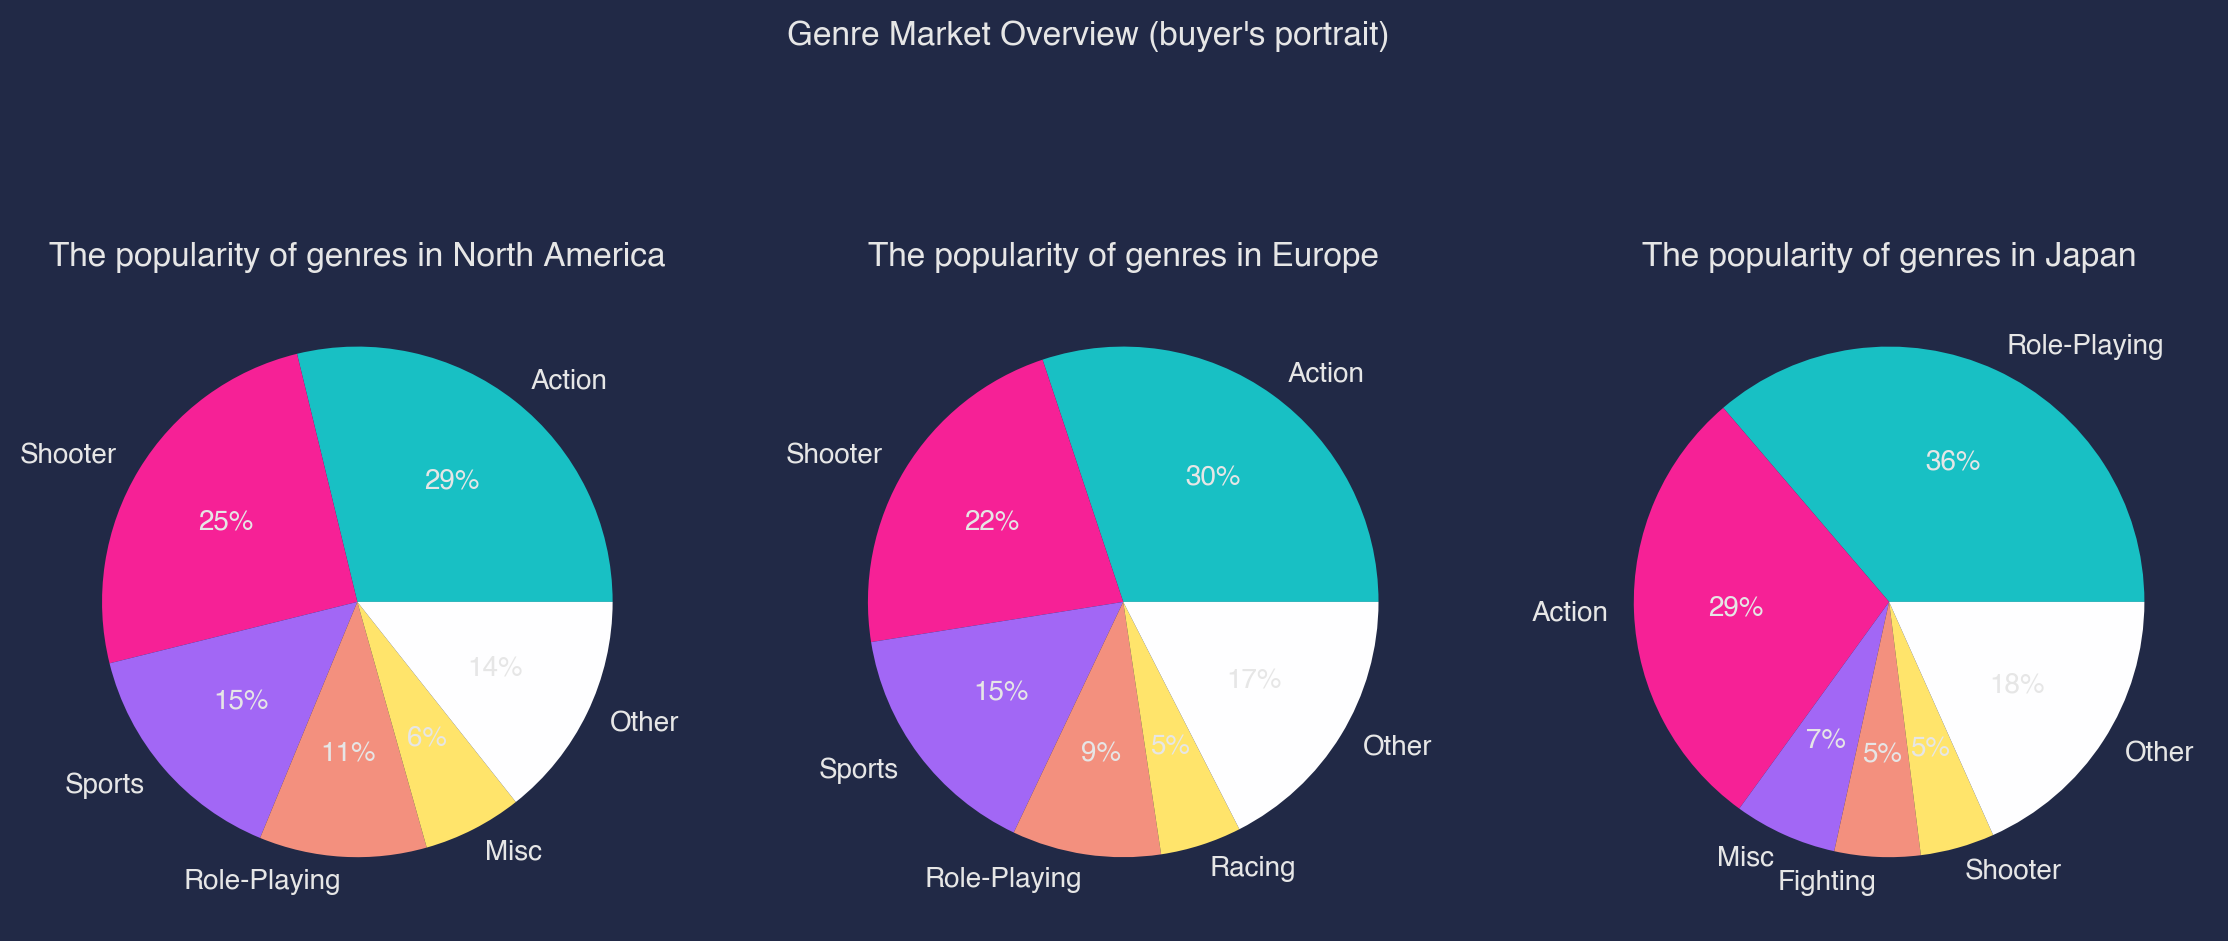

In [221]:
#standing three pie charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle("Genre Market Overview (buyer's portrait)")
data_genretop5_na.plot(kind='pie', y='na_sales', labels=data_genretop5_na['genre'], legend=False,
                         autopct='%.0f%%', ax=ax1)
ax1.set_ylabel('')
ax1.set_title('The popularity of genres in North America')
data_genretop5_eu.plot(kind='pie', y='eu_sales', labels=data_genretop5_eu['genre'], legend=False,
                         autopct='%.0f%%', ax=ax2)
ax2.set_ylabel('')
ax2.set_title('The popularity of genres in Europe')
data_genretop5_jp.plot(kind='pie', y='jp_sales', labels=data_genretop5_jp['genre'], legend=False,
                         autopct='%.0f%%', ax=ax3)
ax3.set_ylabel('')
ax3.set_title('The popularity of genres in Japan')
plt.show()

### Step 5.2. Conclusion: The most popular genre in North America is Action, in Europe - Action, and in Japan - Role-Playing

## Step 5.3. Does the ESRB rating affect sales in a particular region

In [225]:
#creating a table for convenient construction of a circular graph
data_rating_na = (
    data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)    
#check 
data_rating_na

,rating,na_sales
0,M,165.21
1,E,79.05
2,E10+,54.24
3,T,49.79


In [227]:
#creating a table for convenient construction of a circular graph
data_rating_eu = (
    data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)    
#check 
data_rating_eu

,rating,eu_sales
0,M,145.32
1,E,83.36
2,E10+,42.69
3,T,41.95


In [229]:
#creating a table for convenient construction of a circular graph
data_rating_jp = (
    data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)    
#check 
data_rating_jp

,rating,jp_sales
0,T,20.59
1,E,15.14
2,M,14.11
3,E10+,5.89


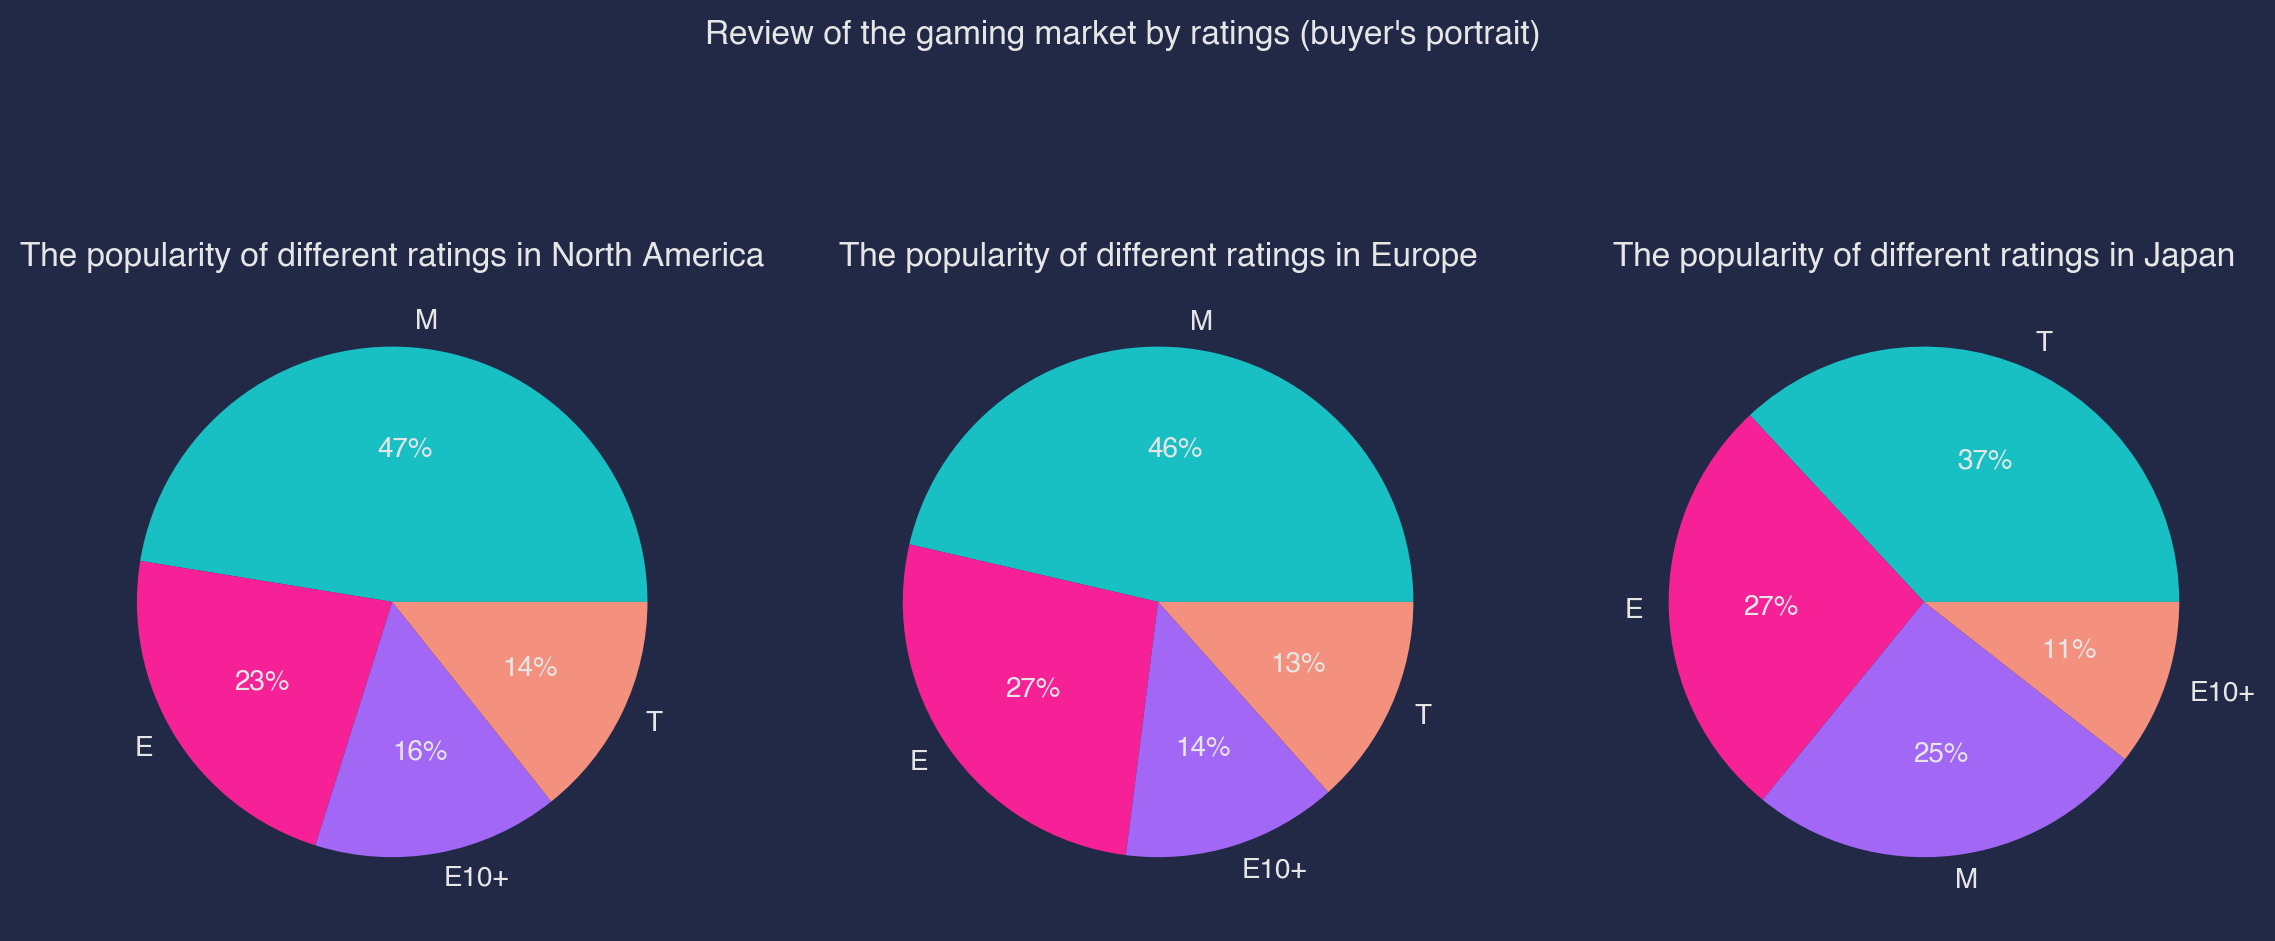

In [231]:
#standing three pie charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle("Review of the gaming market by ratings (buyer's portrait)")
data_rating_na.plot(kind='pie', y='na_sales', labels=data_rating_na['rating'], legend=False,
                         autopct='%.0f%%', ax=ax1)
ax1.set_ylabel('')
ax1.set_title('The popularity of different ratings in North America')
data_rating_eu.plot(kind='pie', y='eu_sales', labels=data_rating_eu['rating'], legend=False,
                         autopct='%.0f%%', ax=ax2)
ax2.set_ylabel('')
ax2.set_title('The popularity of different ratings in Europe')
data_rating_jp.plot(kind='pie', y='jp_sales', labels=data_rating_jp['rating'], legend=False,
                         autopct='%.0f%%', ax=ax3)
ax3.set_ylabel('')
ax3.set_title('The popularity of different ratings in Japan')
plt.show()

### Step 5.3. Conclusion: Japan is very different from other regions.  Her distribution of sales by ratings is completely different.

# Step 6. Hypothesis Testing

## Step 6.1. Testing the first hypothesis

In [236]:
#creating a new dataframe in which all user ratings are positive and not zero
data_4 = data.loc[data['user_score']>0]

**Zero hypothetical: The average user ratings of the Xbox One and PC platforms are the same. Alternative hypothesis: The average user ratings of the Xbox One and PC platforms are different.**

In [239]:
# conducting a t-test where the alternative hypothesis is two-sided
alpha = 0.05
result = st.ttest_ind(data_4[data_4['platform']=='XOne']['user_score'], data_4[data_4['platform']=='PC']['user_score'], 
                      alternative='two-sided')
display(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    display('Reject the null hypothesis')
else:
    display('There is no reason to reject the null hypothesis')

'p-value: 0.14012658403611647'

'There is no reason to reject the null hypothesis'

**The resulting p-value indicates that although the average ratings of the XOne and PC platforms are not the same, but with a probability of 14%, such or greater difference can be obtained by chance. </b>This is clearly too high a probability to conclude that there is a significant difference between the average ratings of the XOne and PC platforms.**

### Step 6.1. Conclusion: based on the conducted t-test, the null hypothesis cannot be rejected

## Step 6.2. Testing the second hypothesis

**Null hypothesis: The average user ratings of the Action and Sports genres are the same. Alternative hypothesis: Average user ratings of Action and Sports genres are different**

In [245]:
#conducting a t-test where the alternative hypothesis is two-sided 
alpha = 0.05
result = st.ttest_ind(data_4[data_4['genre']=='Action']['user_score'], data_4[data_4['genre']=='Sports']['user_score'], 
                      alternative='two-sided')
display(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    display('Reject the null hypothesis')
else:
    display('There is no reason to reject the null hypothesis')

'p-value: 1.0517832389140023e-27'

'Reject the null hypothesis'

### Step 6.2. Conclusion: based on the conducted t-test, the null hypothesis can be safely rejected

# Step 7. The main conclusion: All the data has been "cleaned", all the gaps that could have been replaced have been replaced. All duplicates have been removed. All column names are lowercase

# The average lifetime of each platform is determined, it is equal to 12 years. Most of the games were released on platforms such as PS4, 3DS and XOne. It was definitely noted that the reviews from critics affect the sales of games, unlike user reviews, which do not affect the sales of games at all. The most popular genres are Role-Playing, Action and Shooter.

# In North America, the most popular platform is PS4, and the most popular genre is Action. In Europe, the most popular platform is PS4, and the most popular genre is Action. In Japan, the most popular platform is 3DS, and the most popular genre is Role-Playing.